In [1]:
from mynotebooks import *
%matplotlib inline

exp = Box2DWorld.ExpSetup(pos_nao=(0,0),pos_obj=(0,1.5),obj_type="box",salientMode="minimum", name='human') # minimum
learn = RobotLearning.LearningModel(exp)
nao,obj = exp.nao, exp.obj
learn.load()
SM = learn.SM
exp.start()
learn.myWorldLoop(50)



***********************************************************
Created Exp Setup  human Debug:  False
Created Learning Model bDebug False


In [2]:
learn.setObjTargetPos()

In [ ]:
i,ilast=0,0

iteration:  0


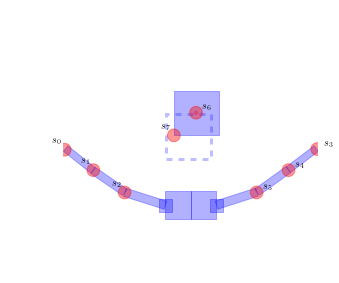

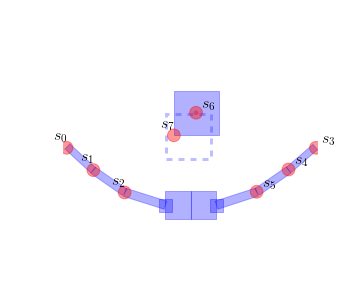

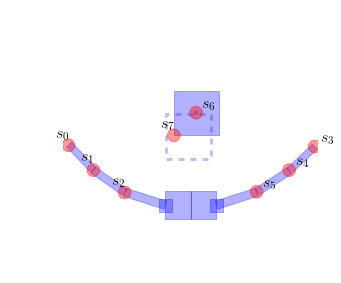

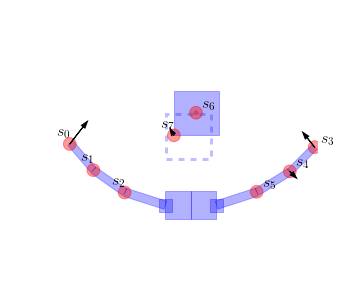

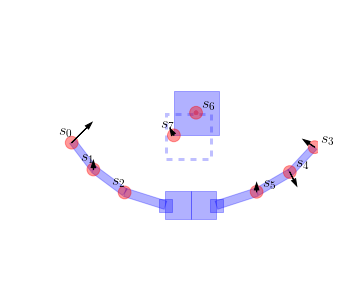

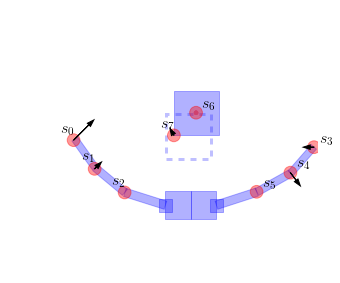

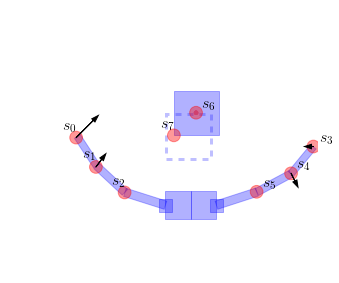

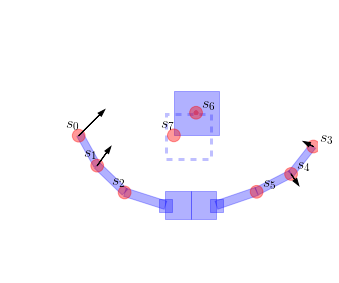

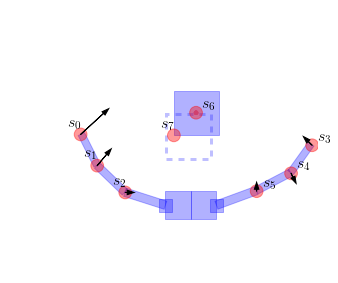

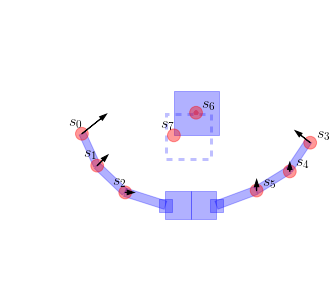

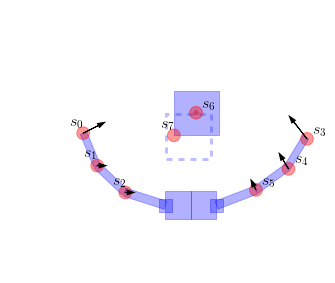

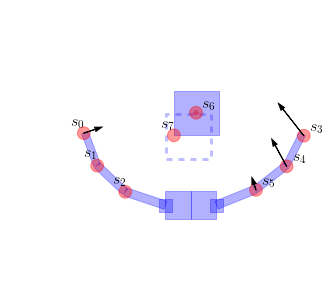

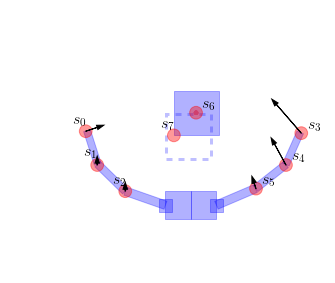

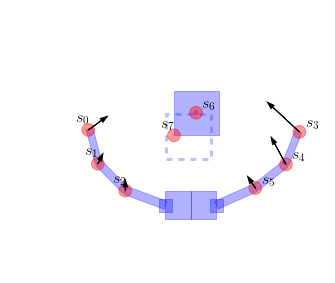

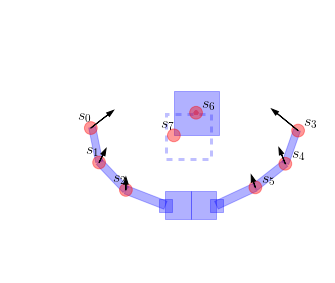

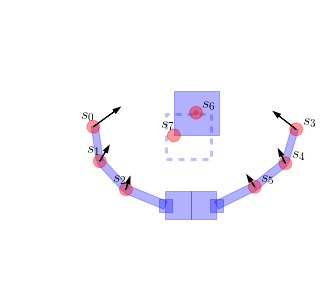

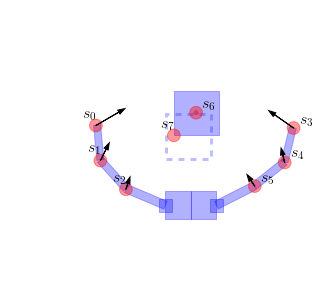

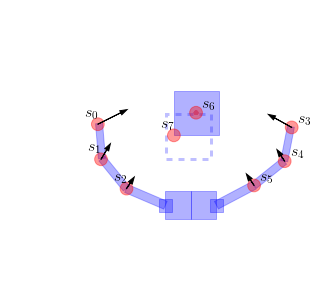

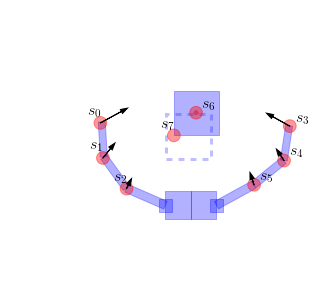

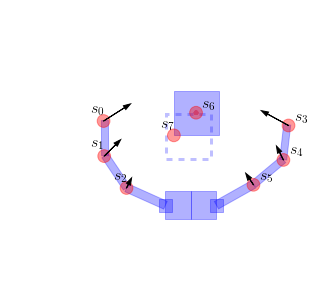

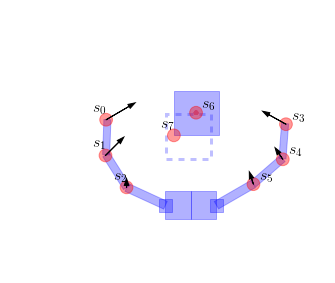

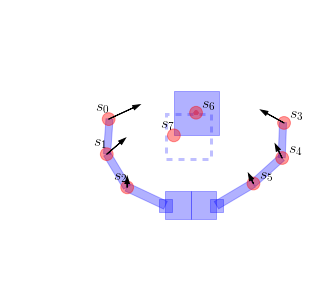

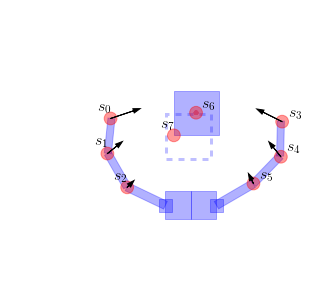

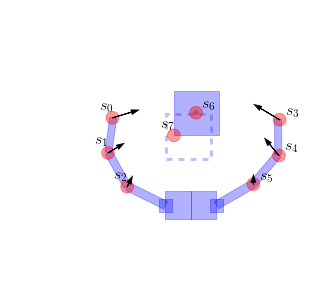

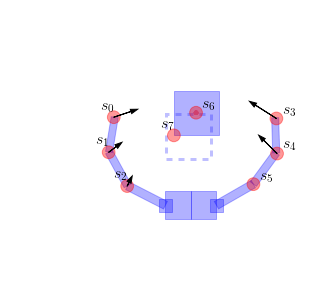

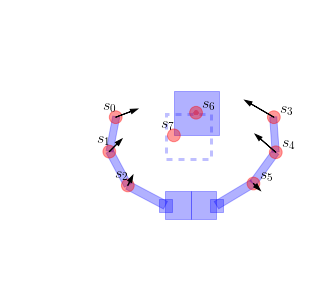

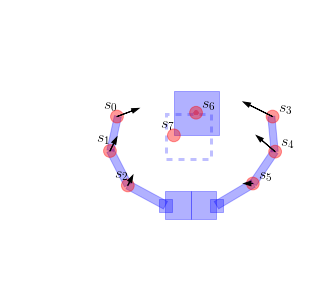

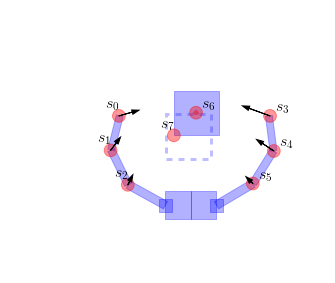

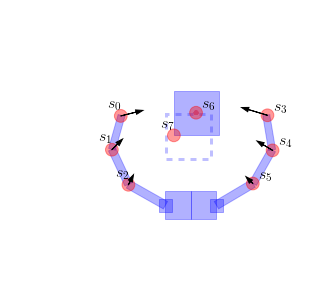

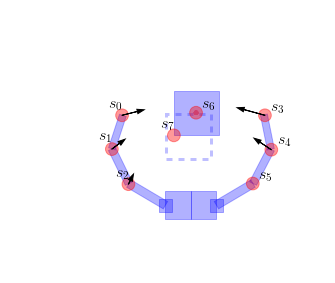

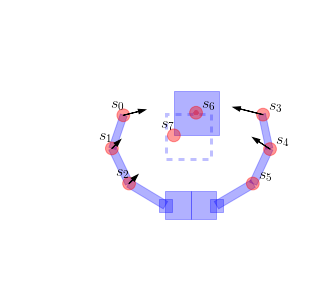

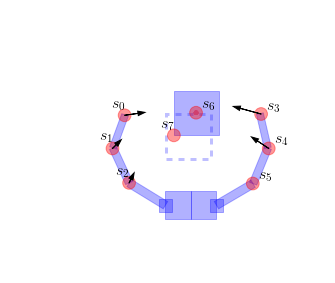

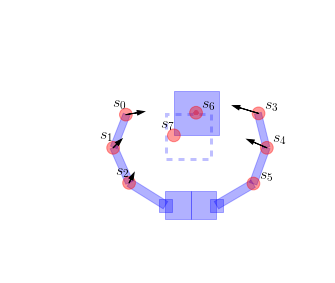

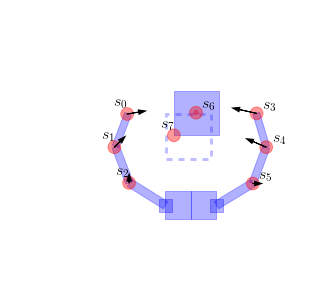

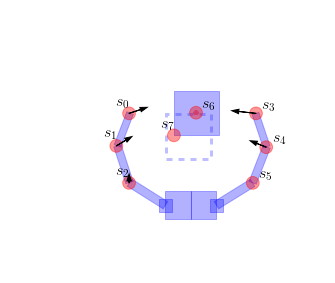

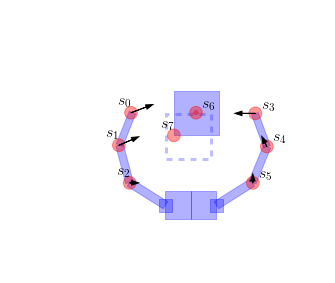

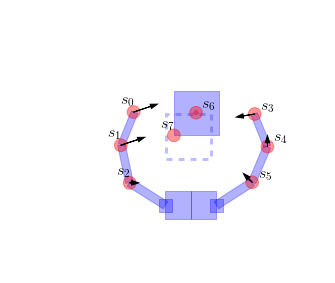

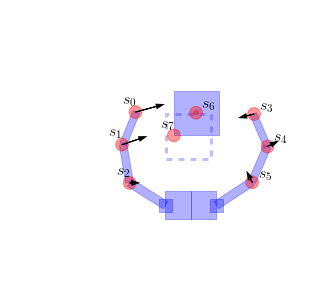

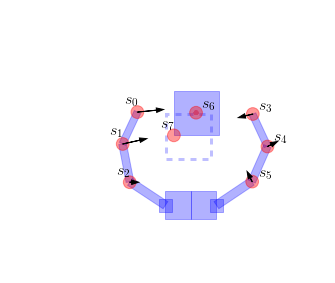

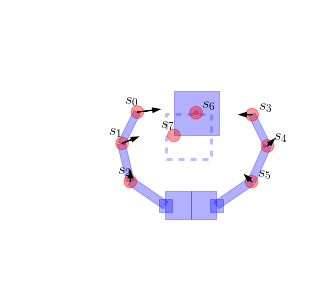

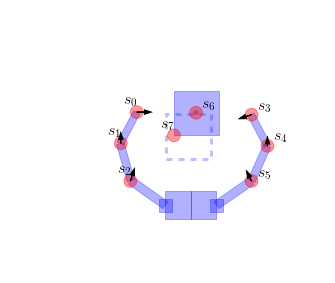

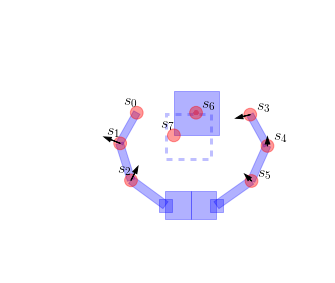

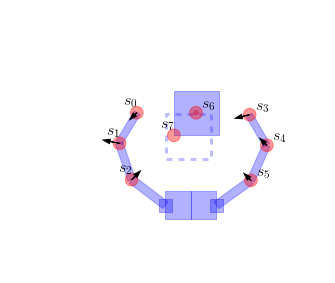

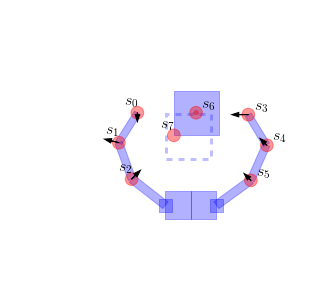

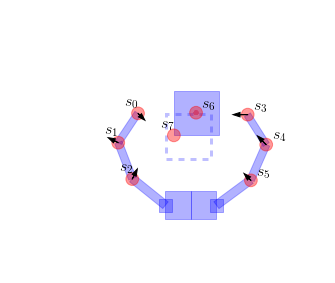

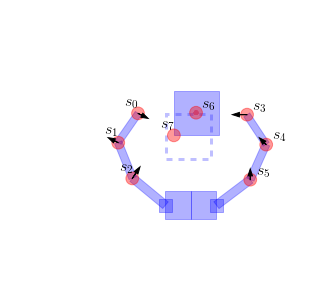

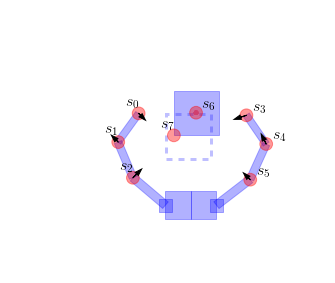

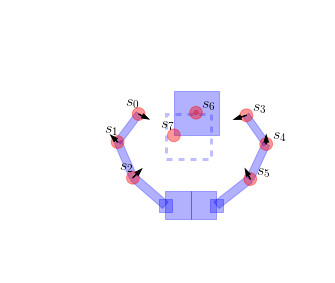

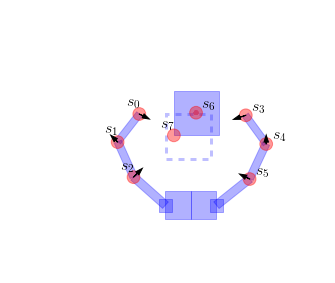

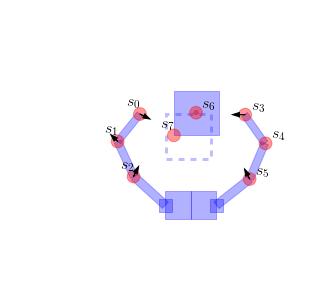

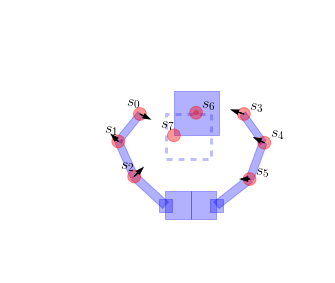

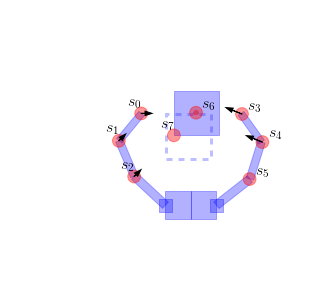

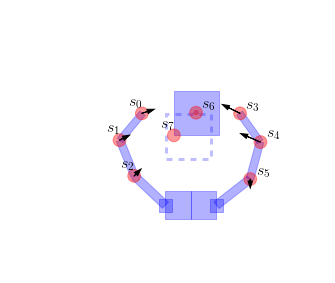

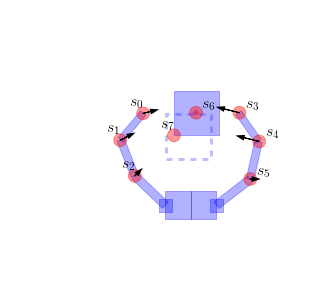

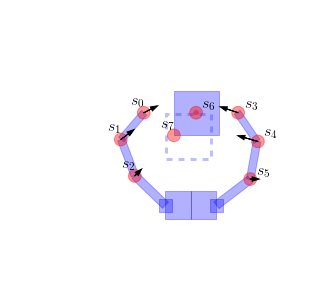

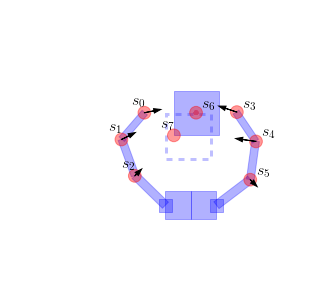

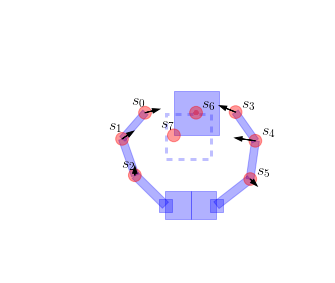

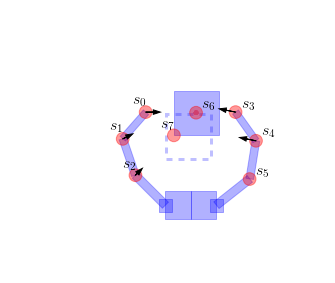

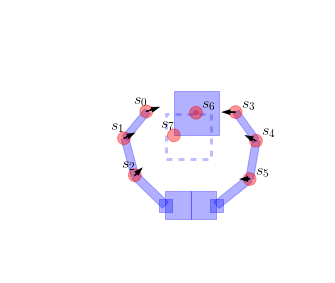

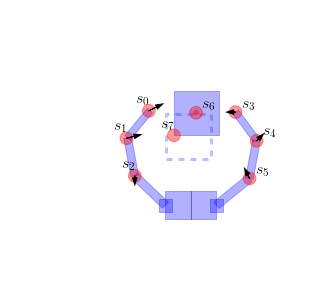

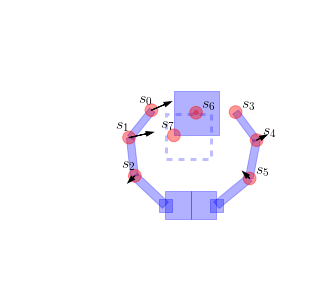

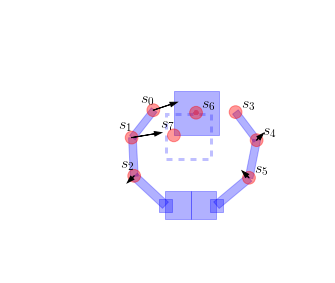

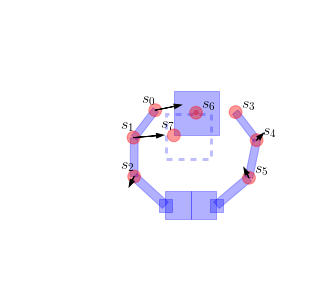

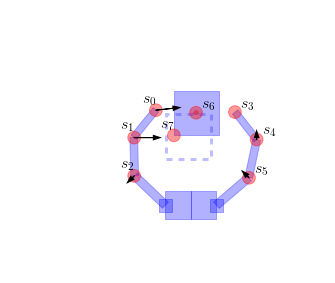

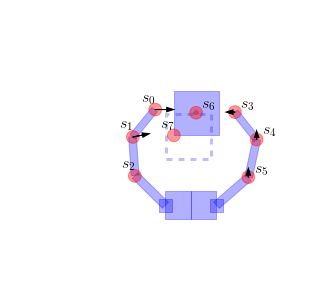

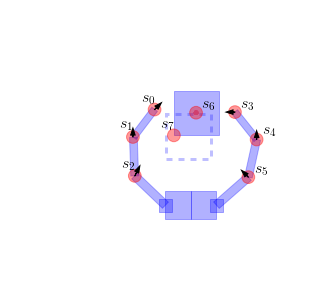

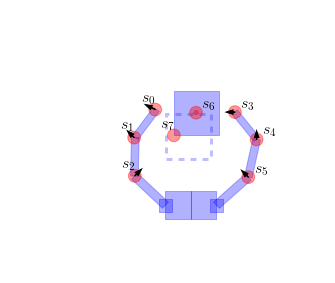

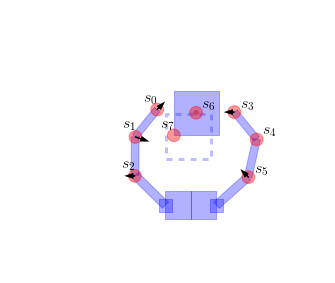

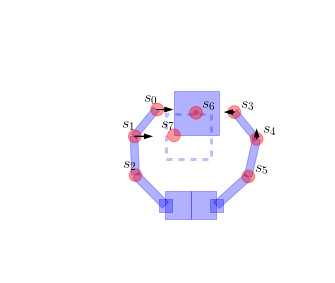

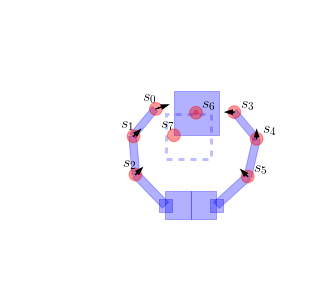

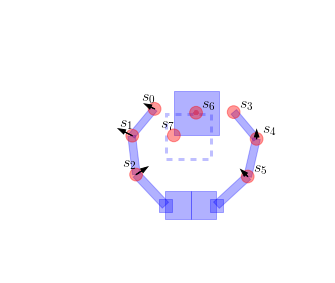

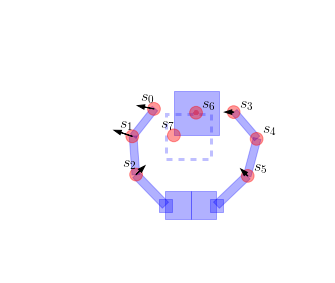

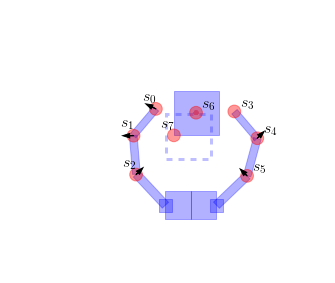

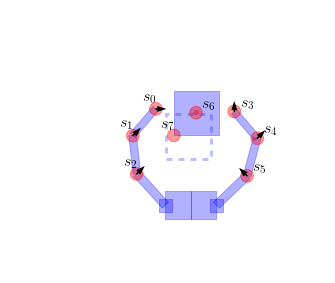

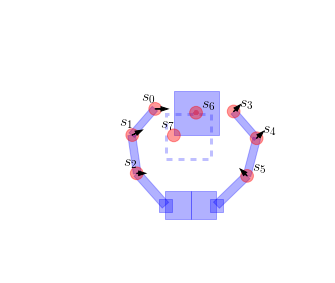

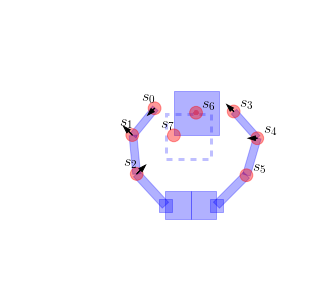

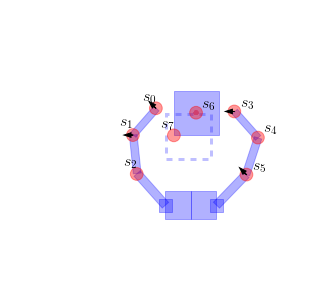

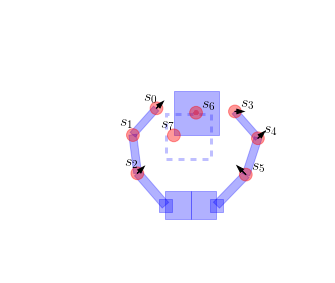

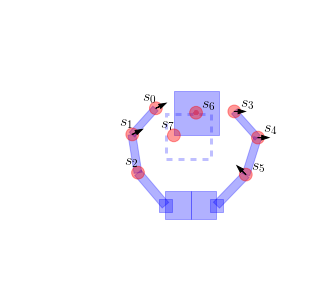

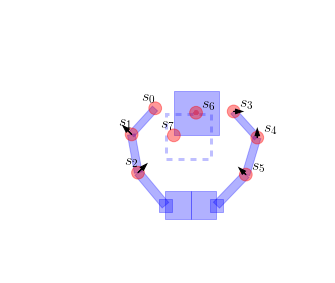

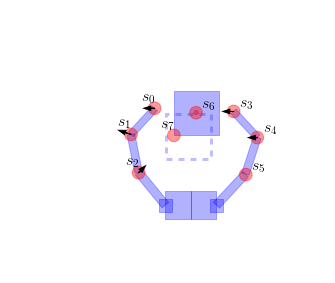

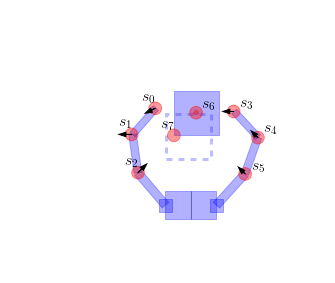

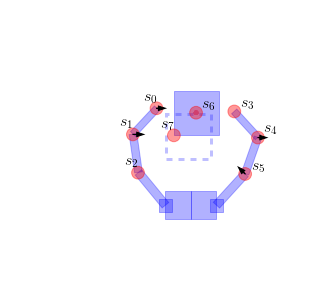

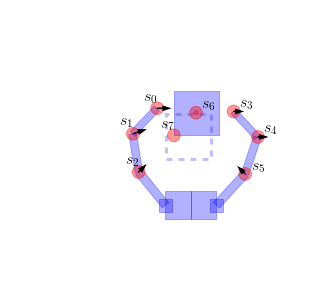

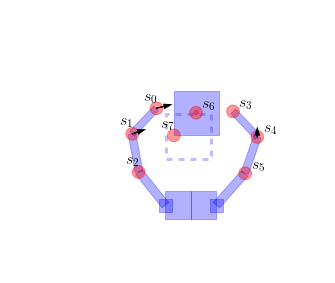

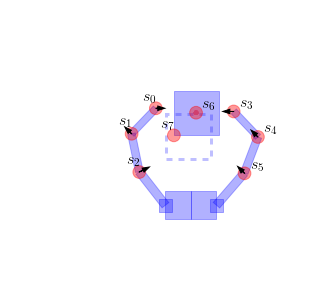

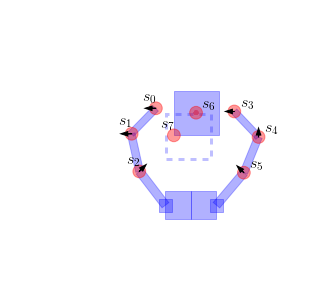

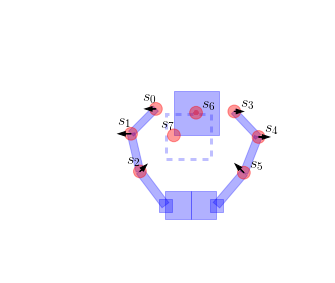

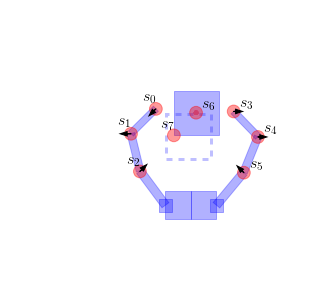

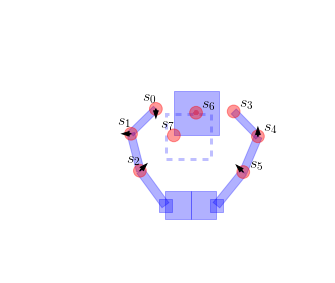

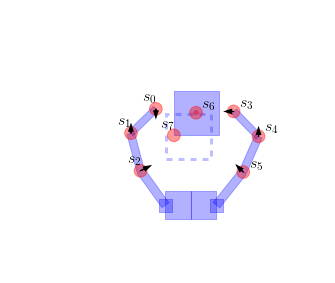

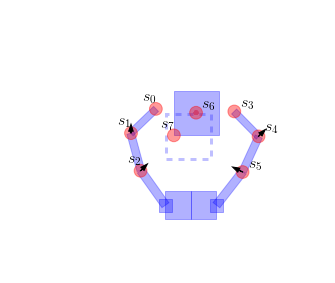

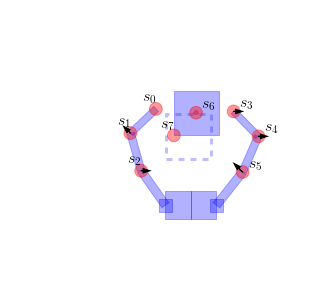

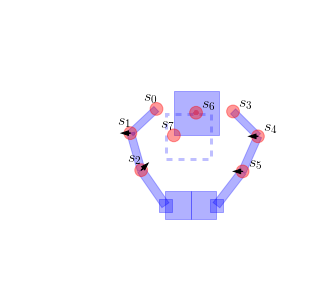

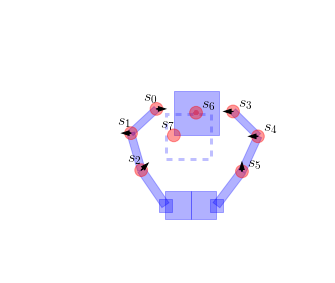

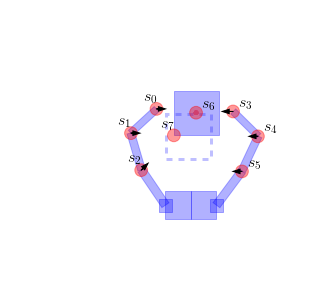

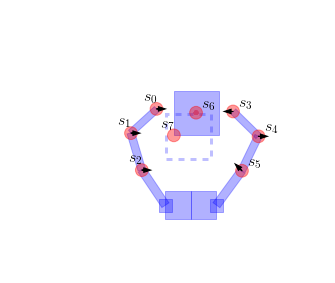

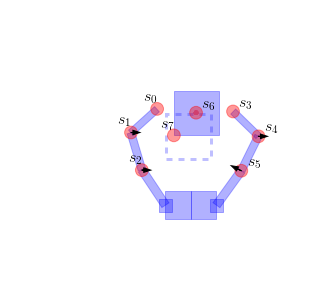

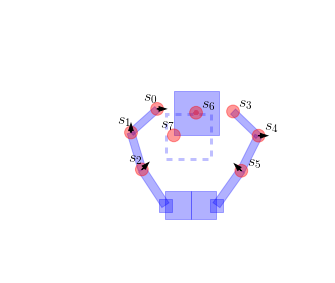

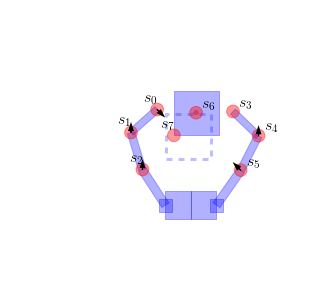

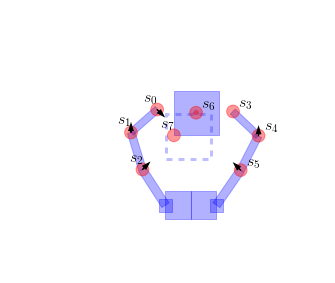

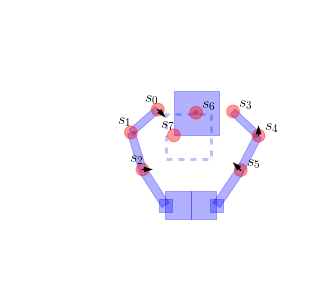

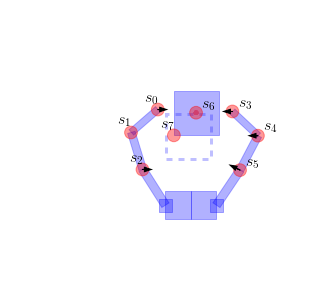

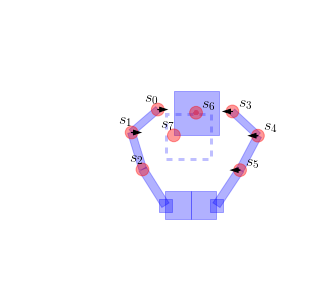

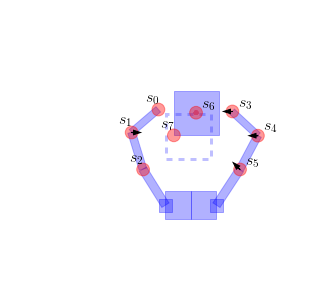

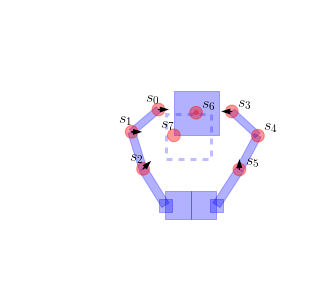

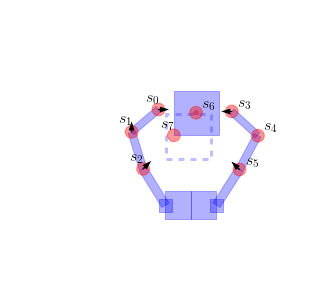

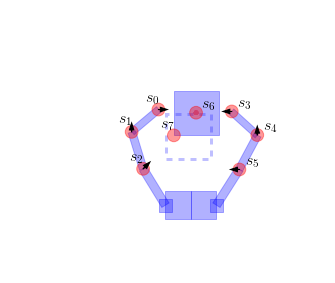

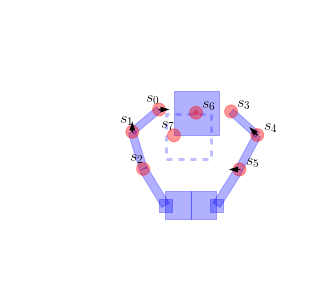

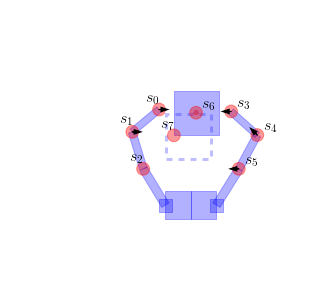

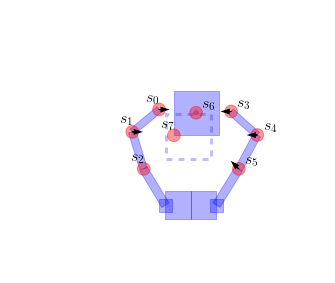

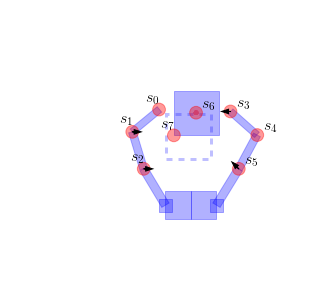

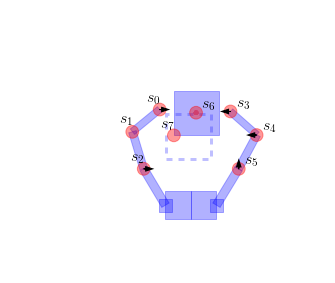

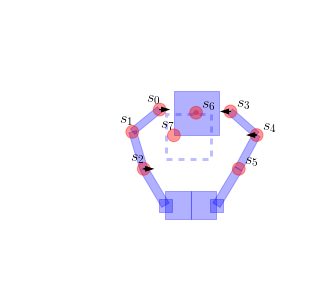

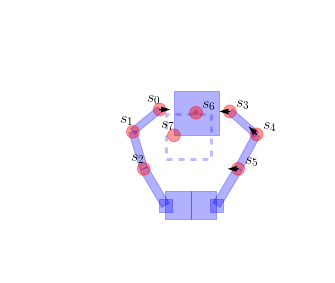

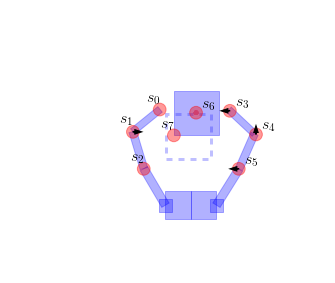

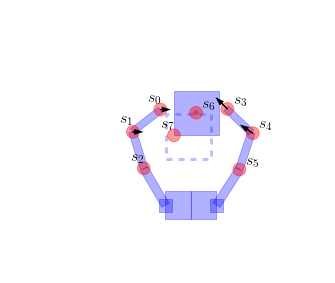

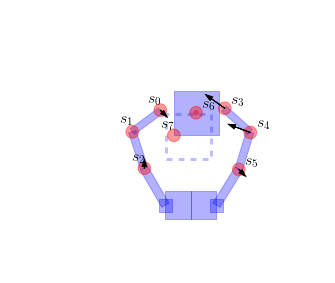

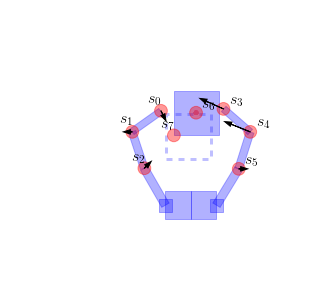

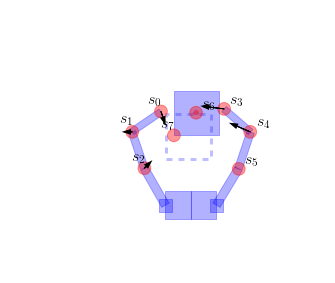

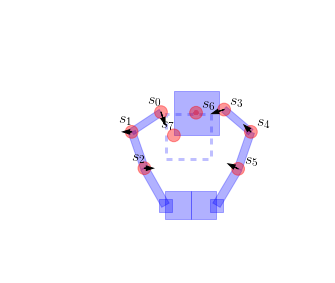

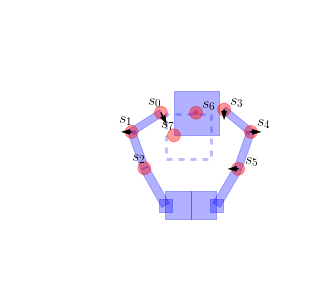

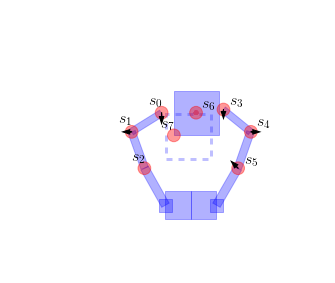

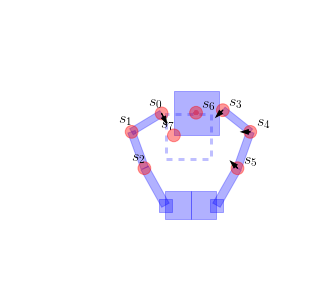

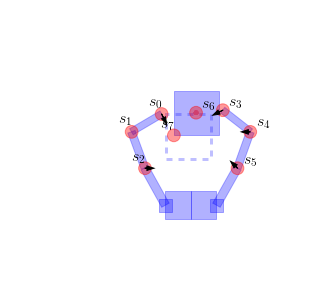

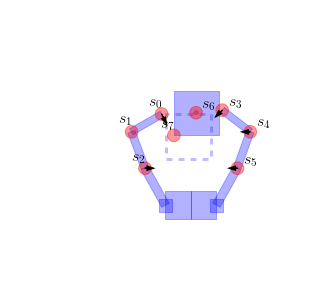

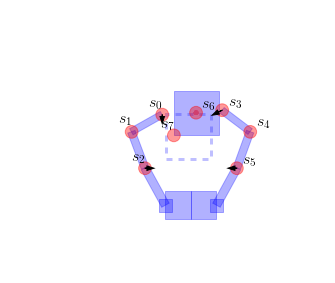

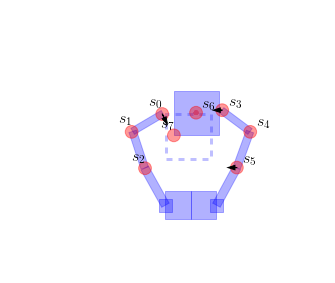

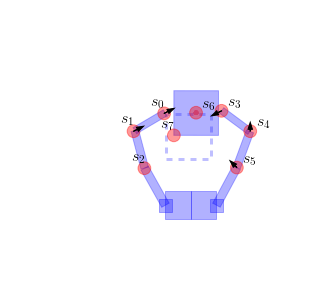

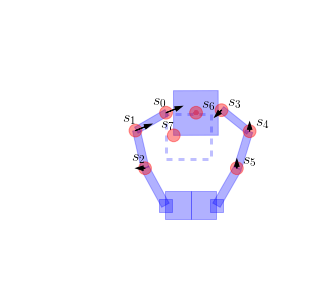

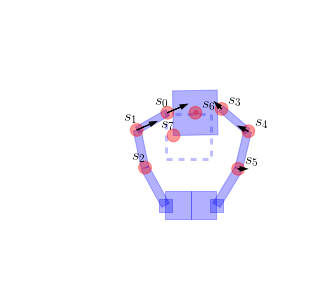

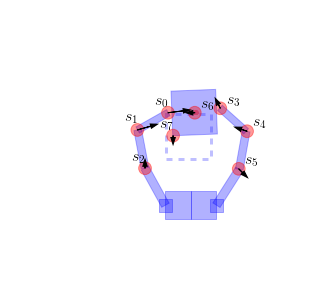

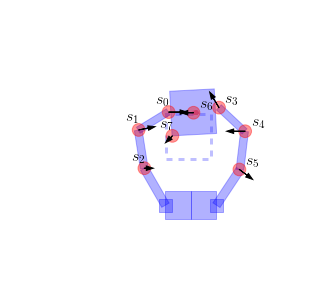

.

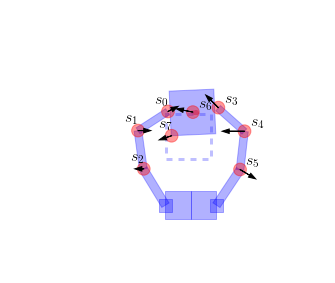

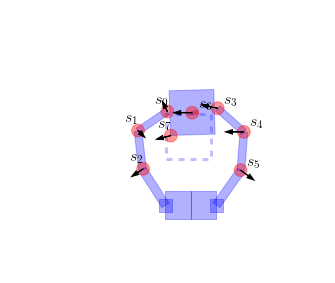

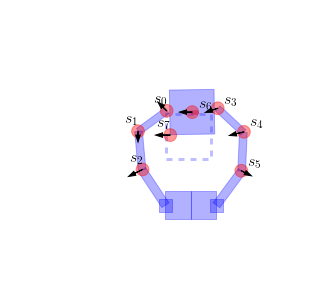

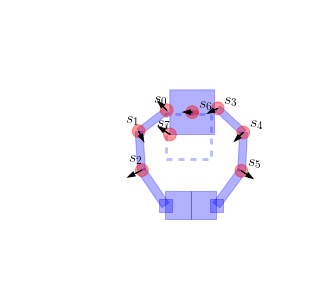

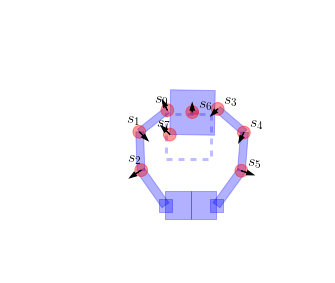

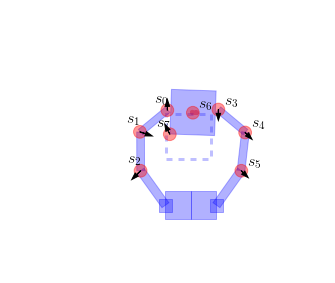

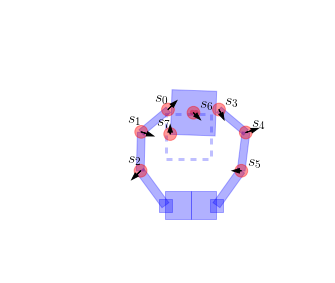

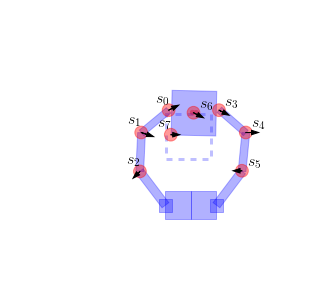

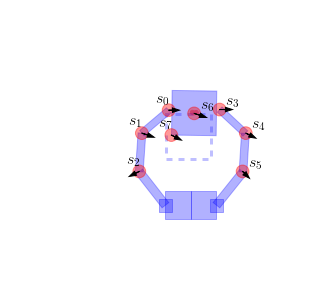

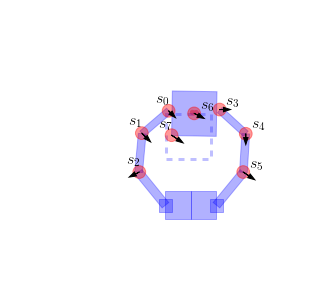

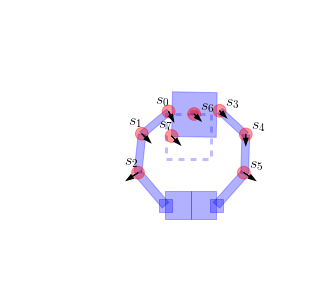

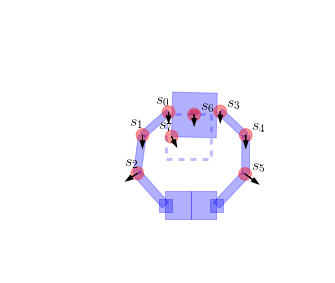

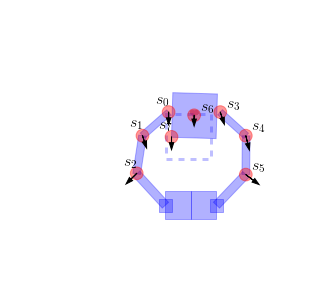

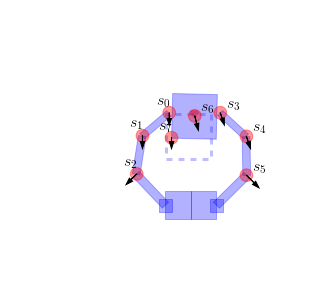

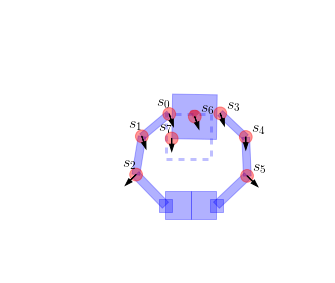

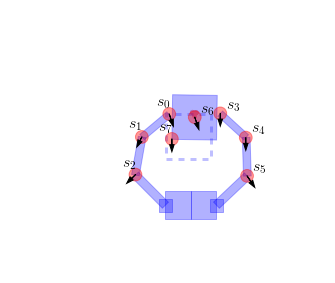

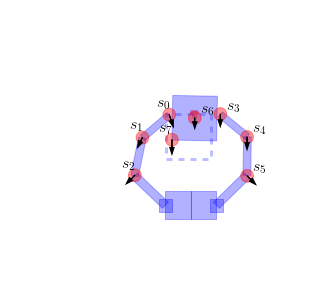

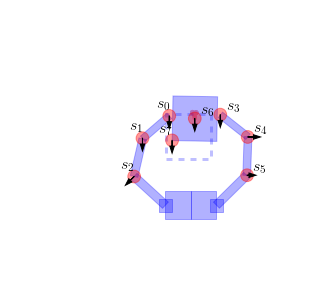

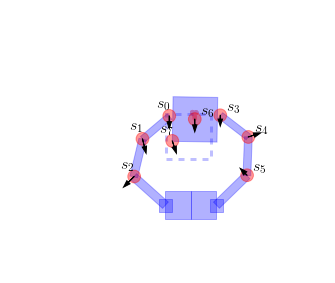

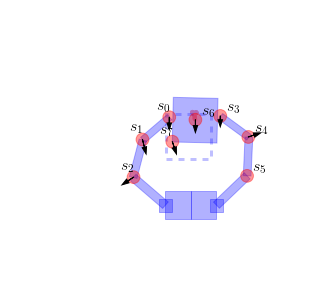

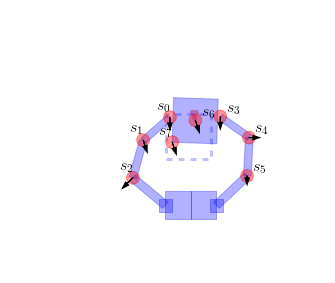

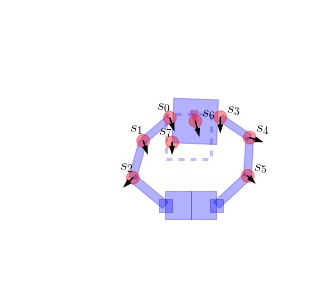

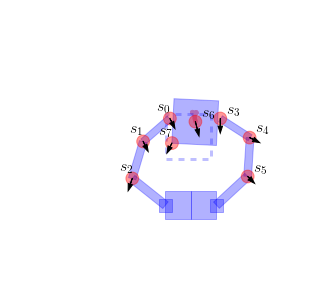

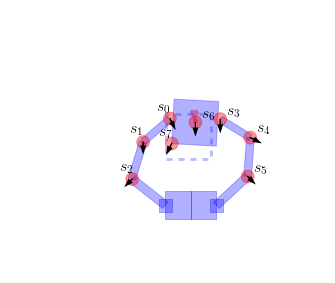

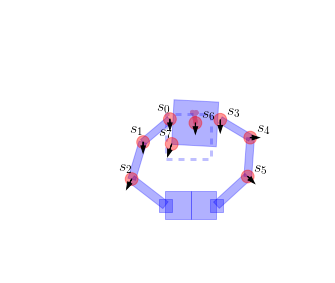

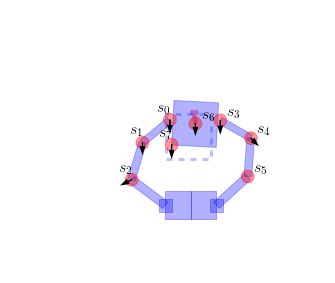

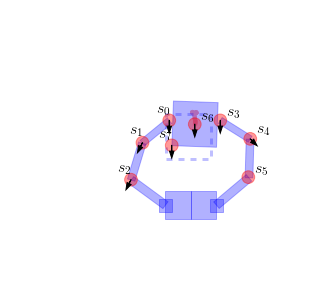

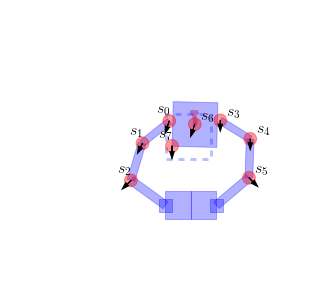

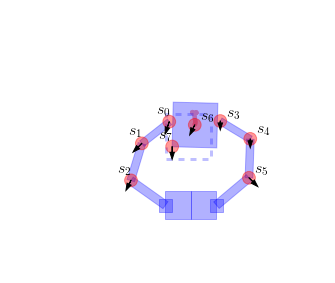

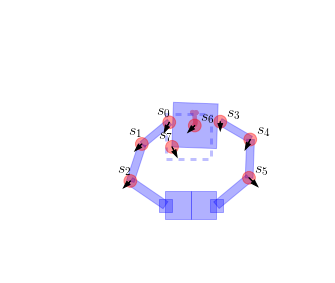

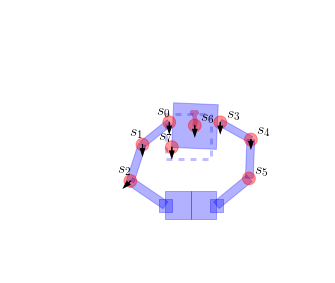

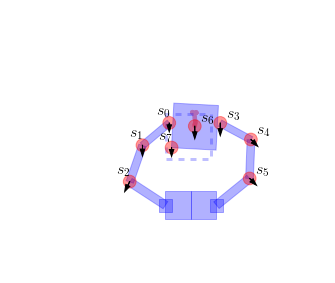

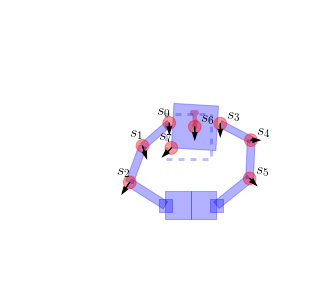

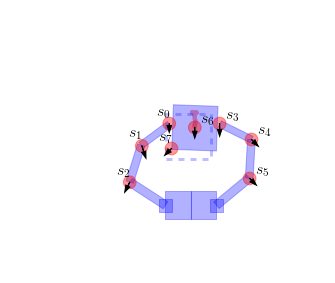

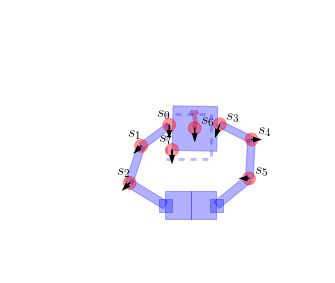

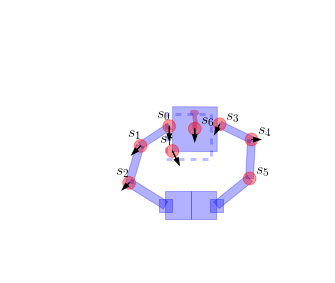

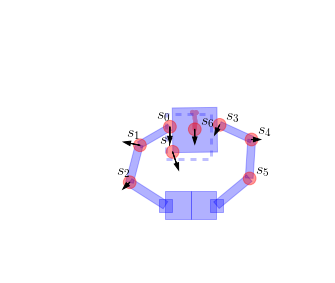

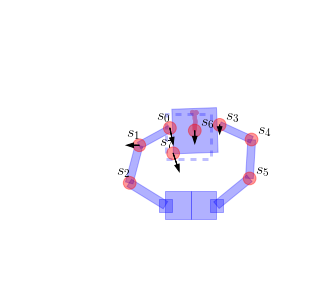

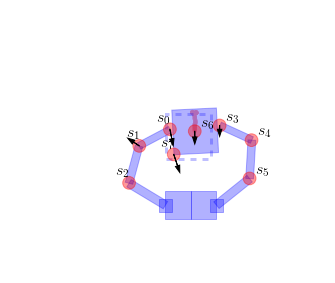

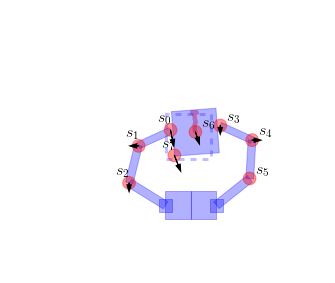

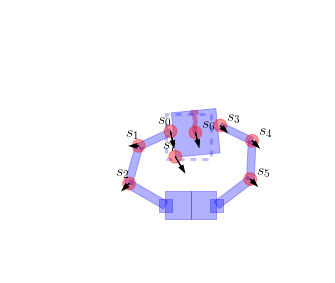

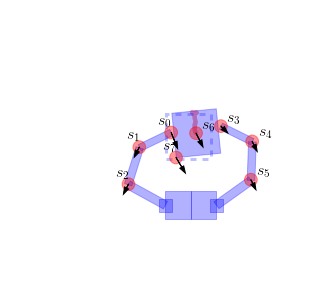

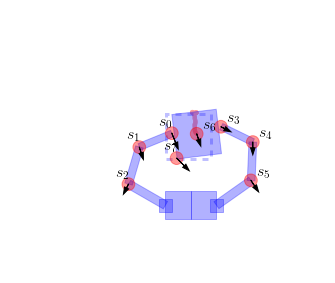

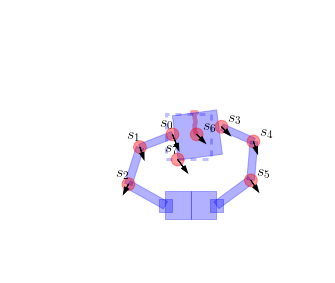

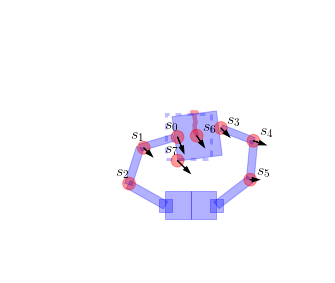

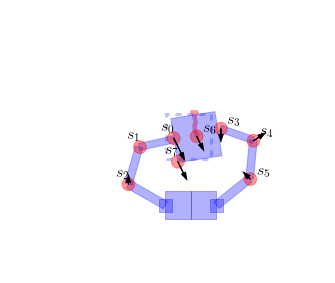

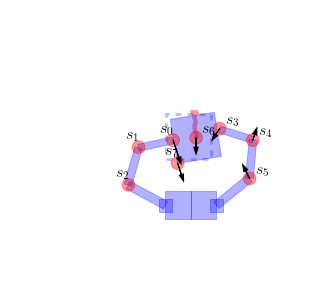

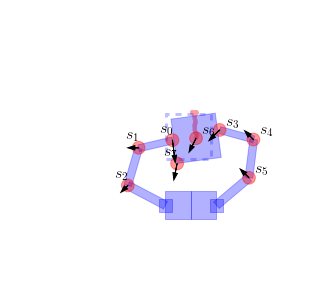

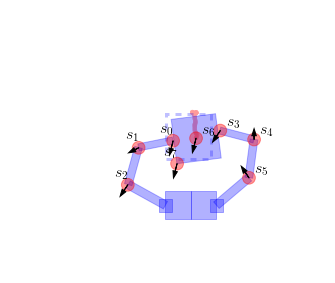

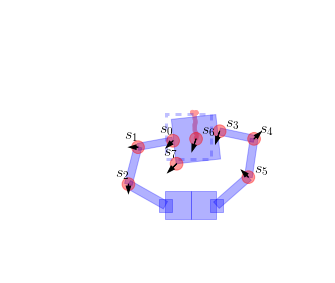

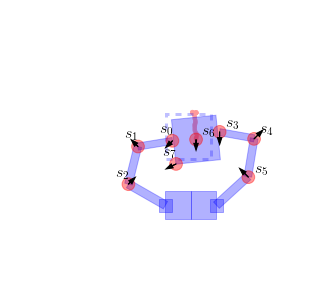

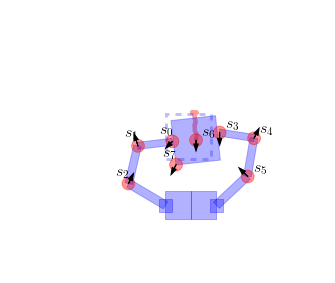

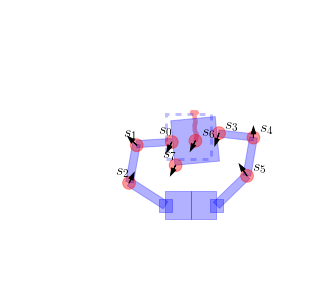

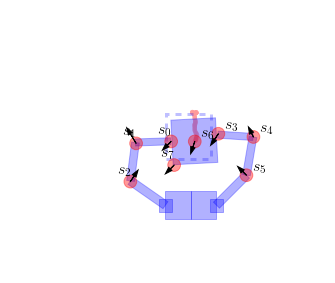

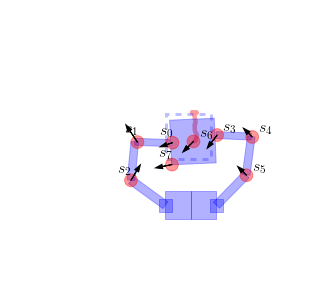

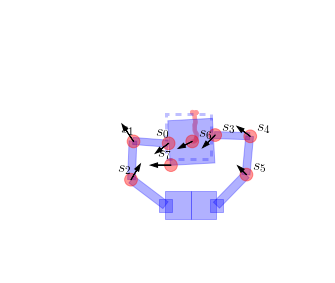

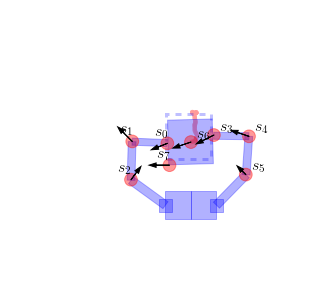

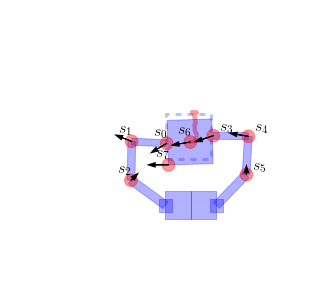

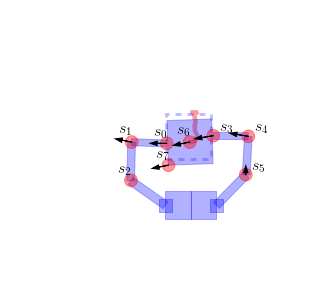

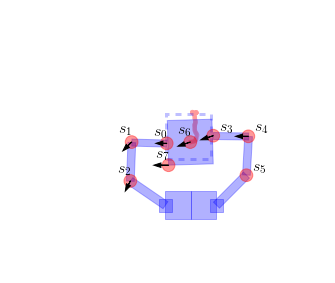

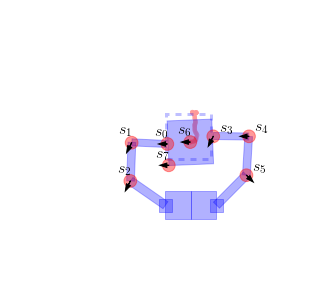

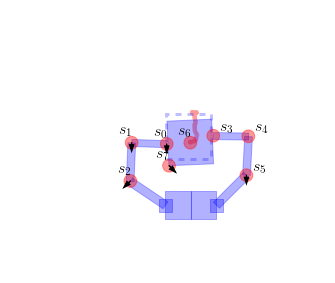

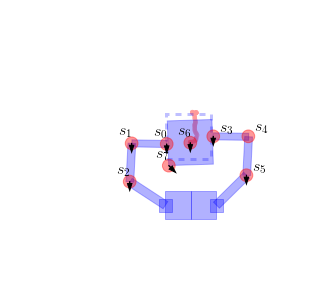

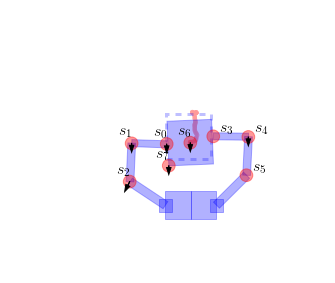

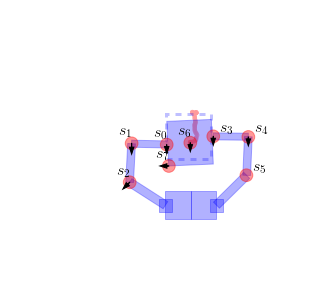

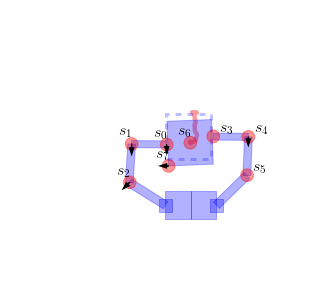

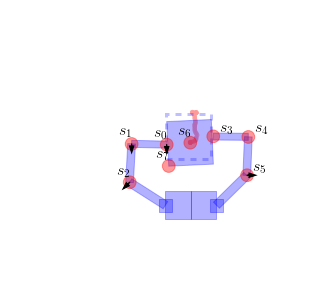

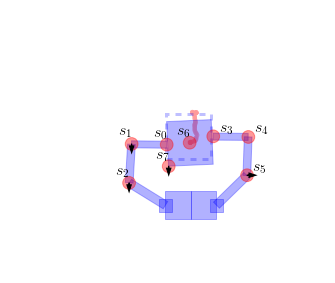

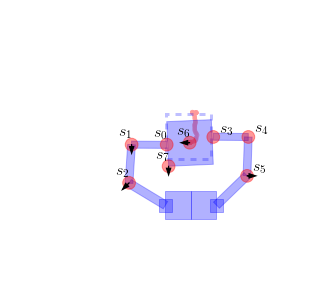

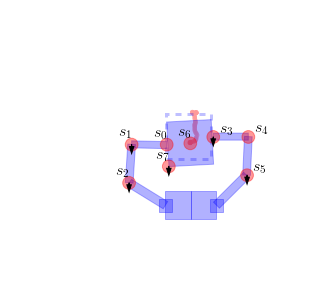

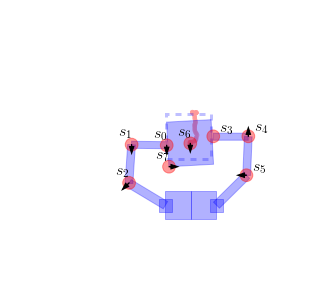

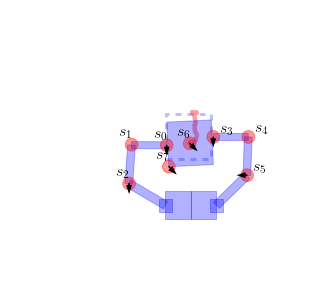

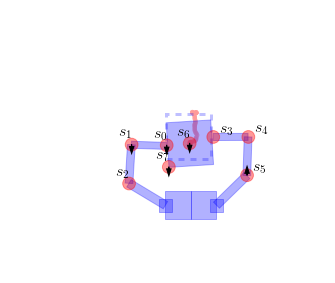

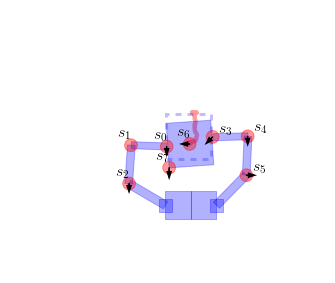

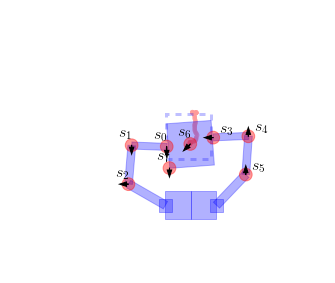

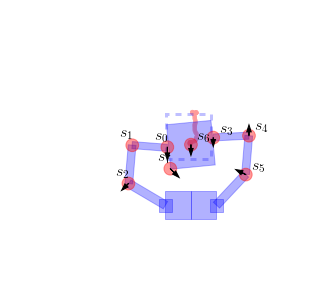

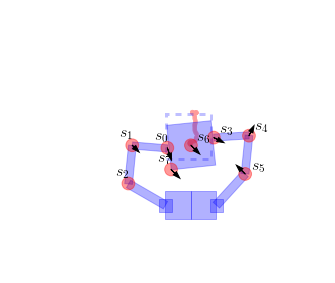

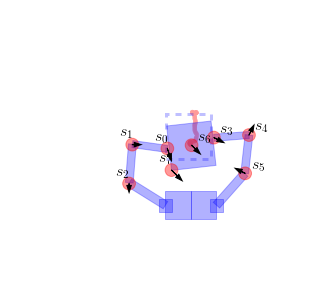

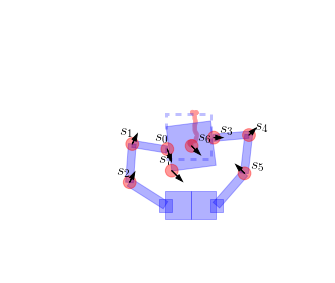

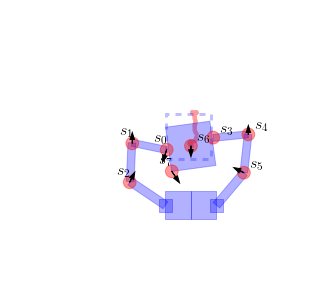

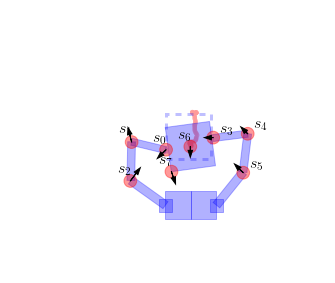

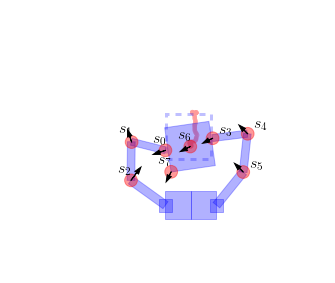

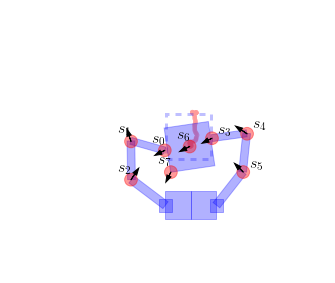

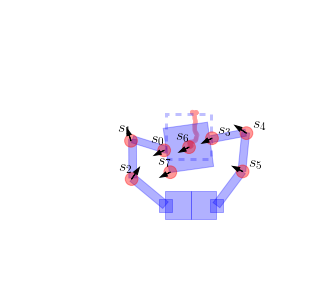

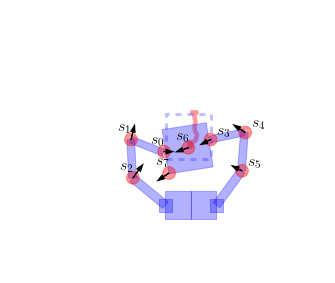

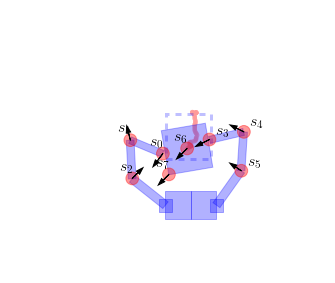

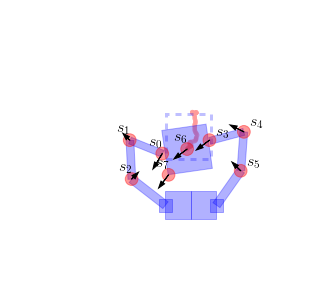

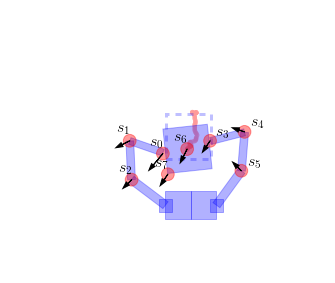

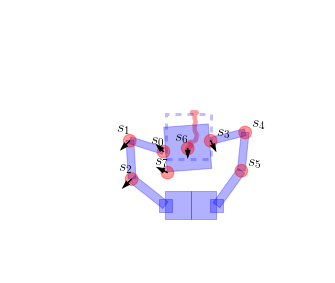

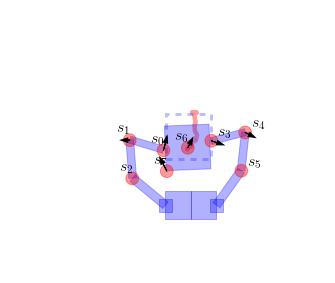

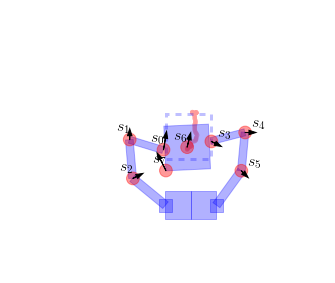

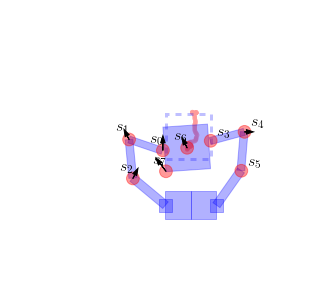

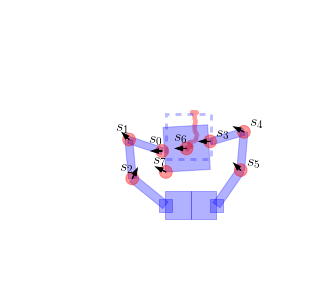

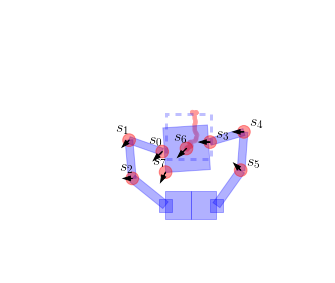

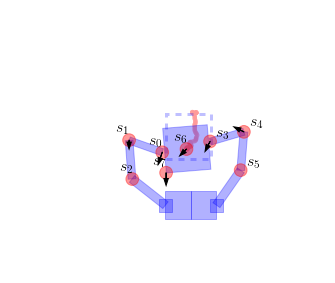

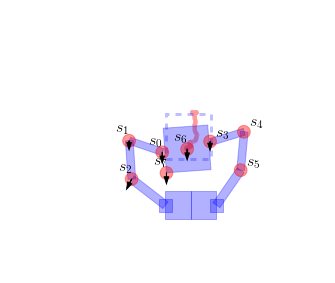

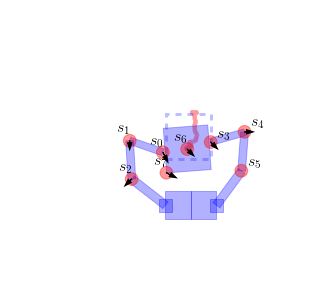

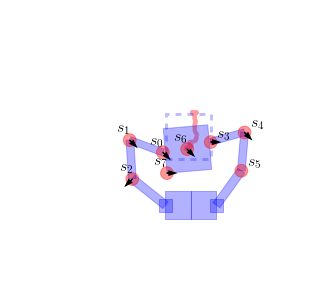

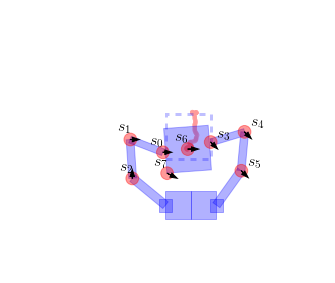

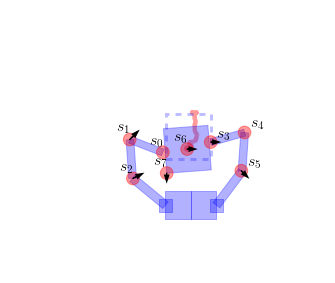

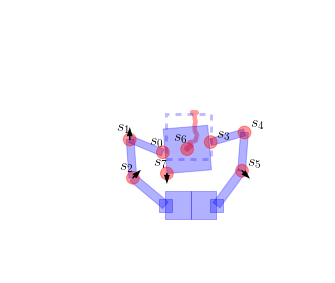

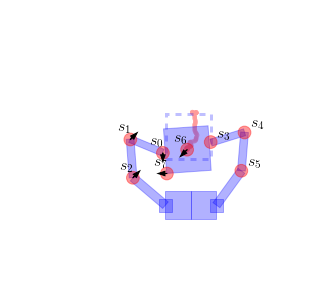

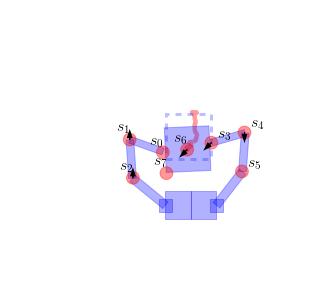

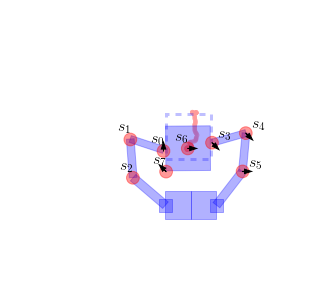

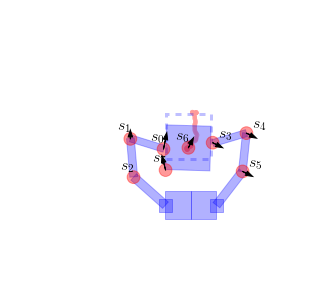

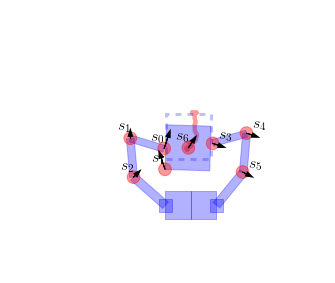

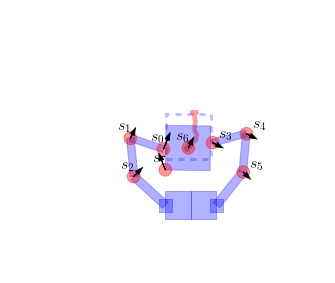

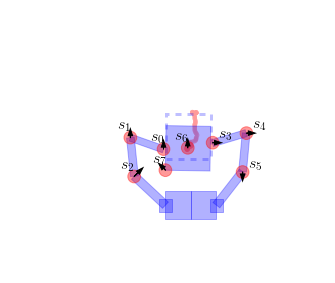

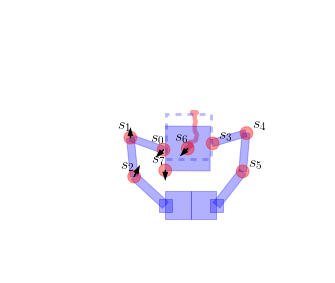

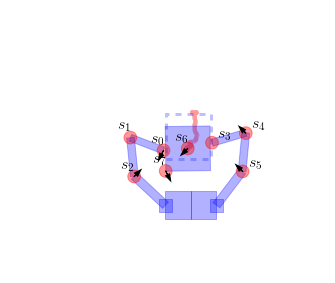

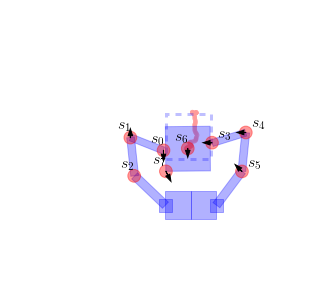

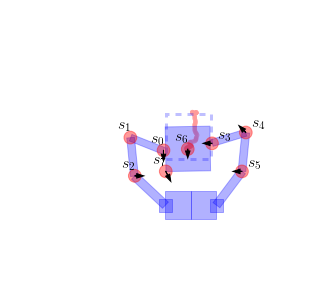

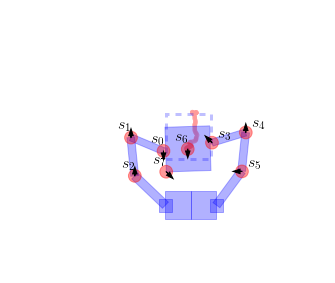

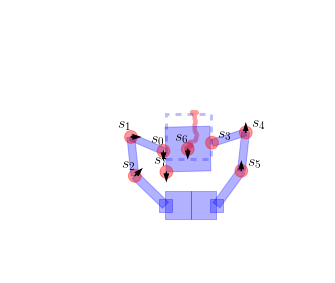

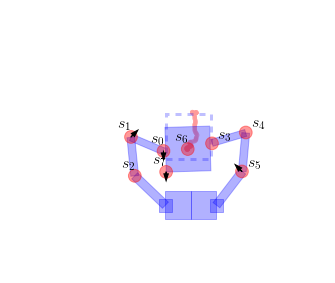

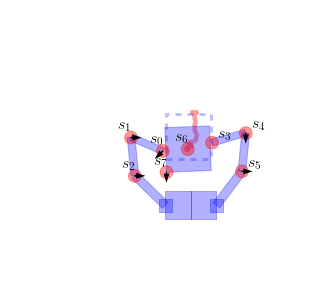

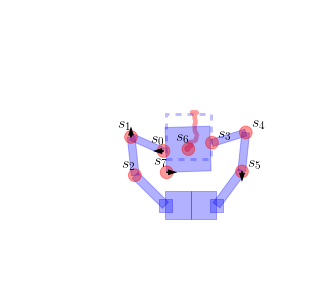

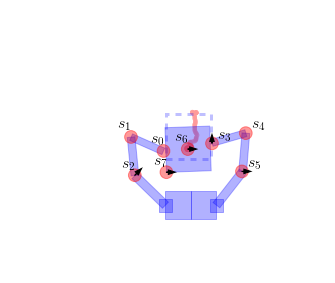

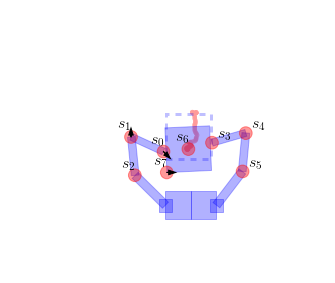

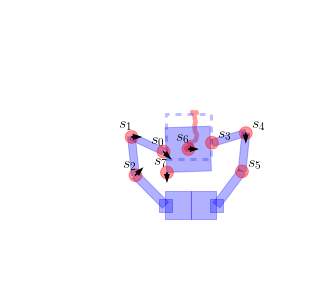

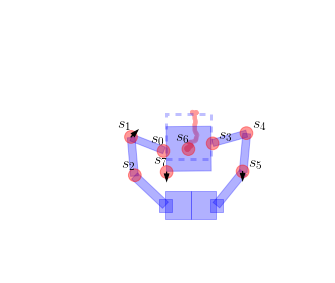

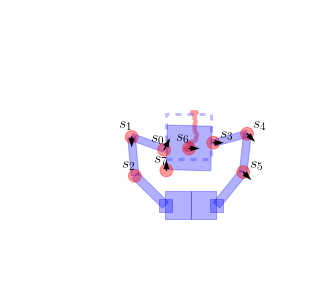

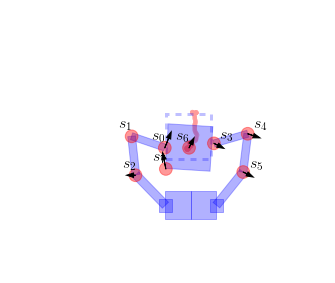

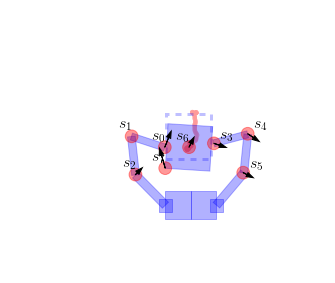

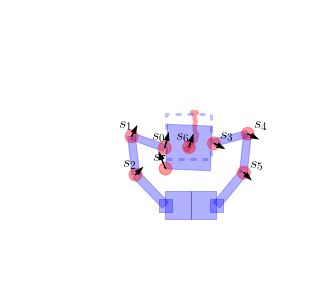

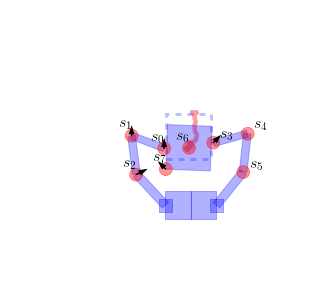

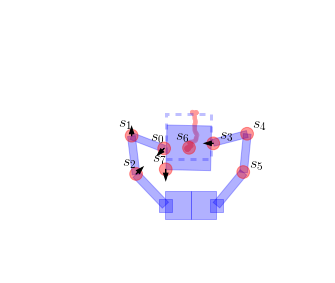

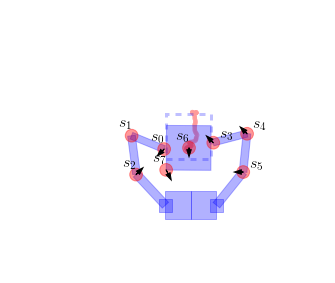

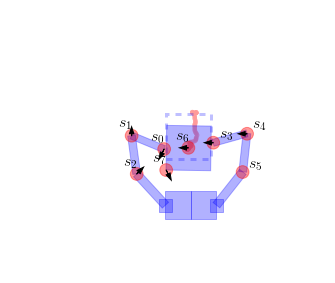

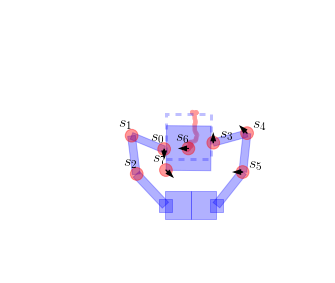

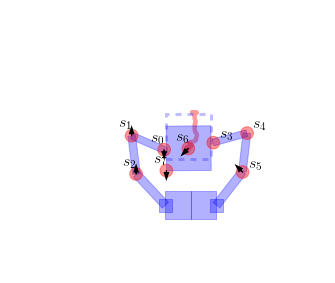

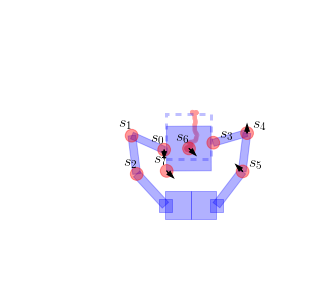

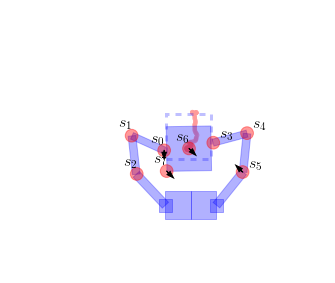

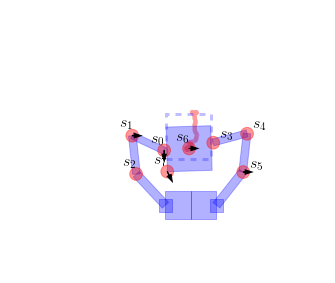

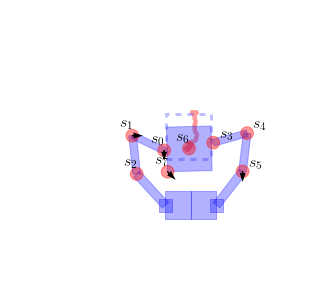

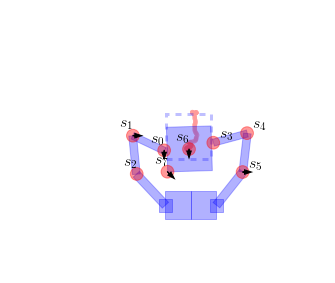

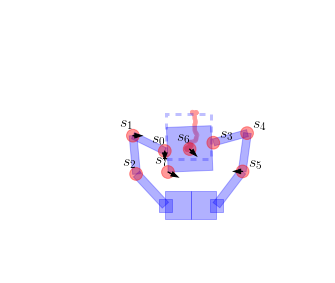

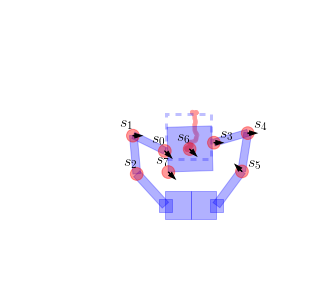

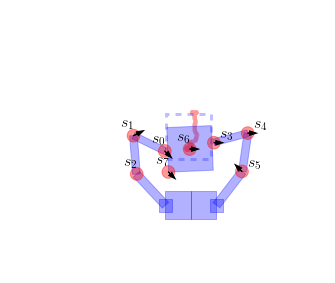

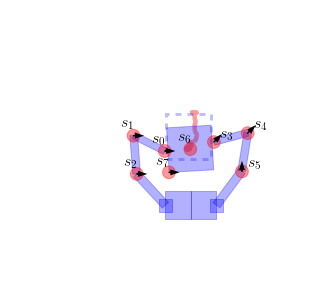

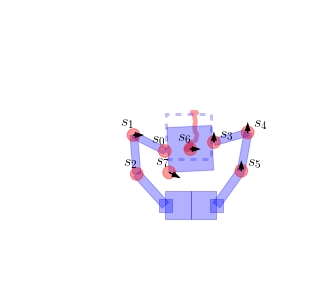

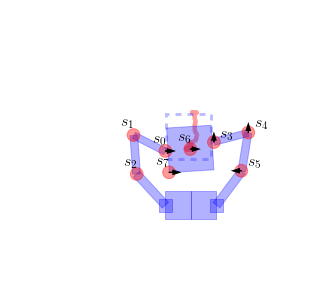

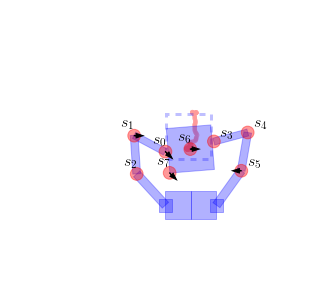

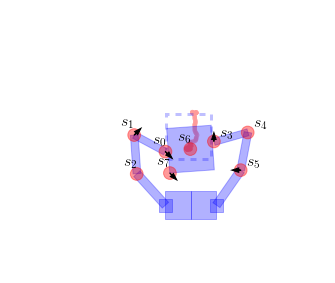

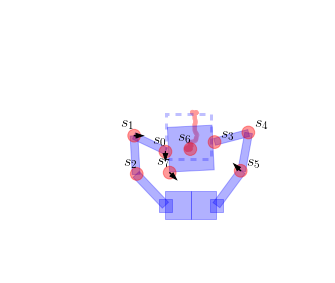

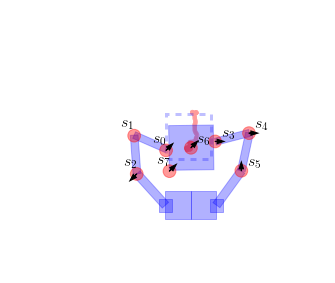

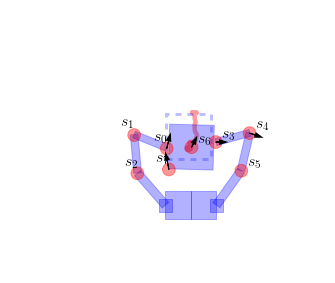

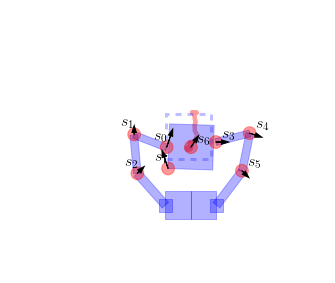

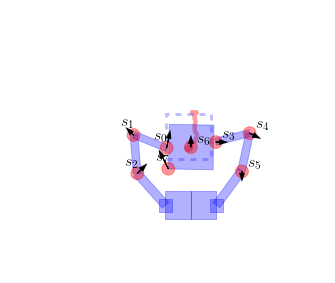

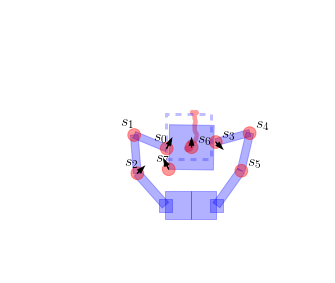

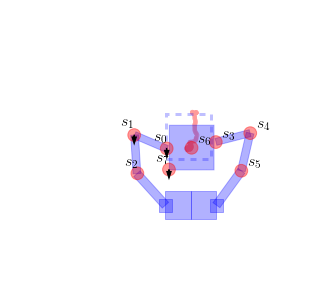

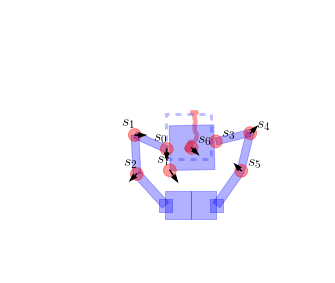

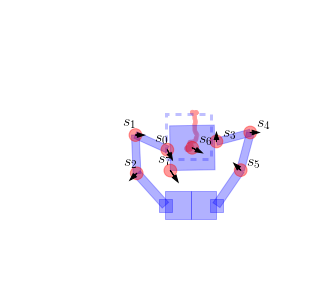

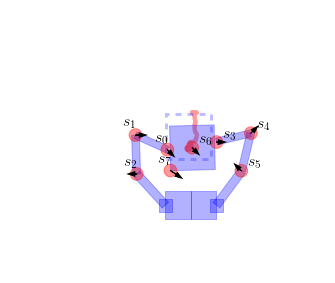

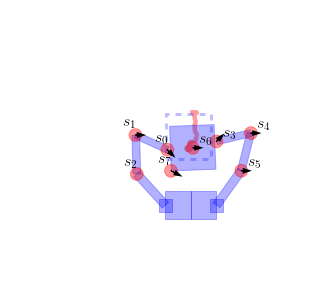

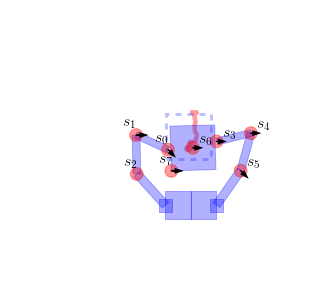

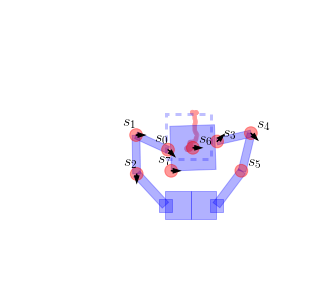

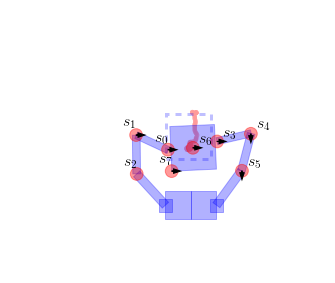

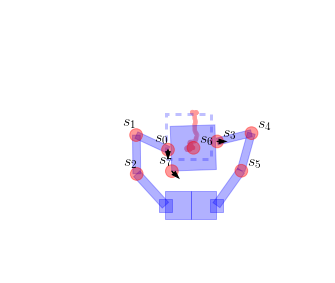

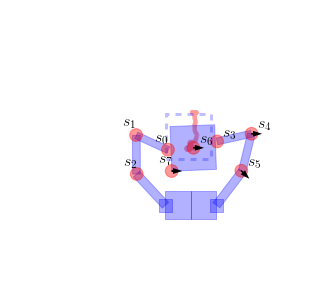

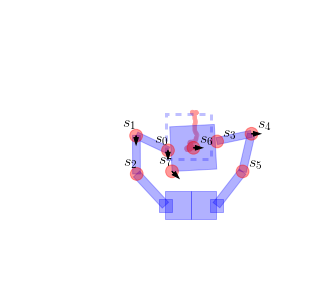

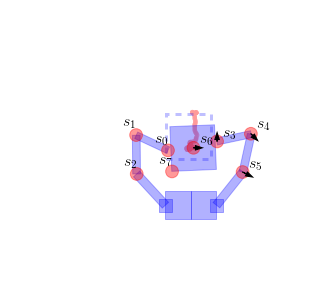

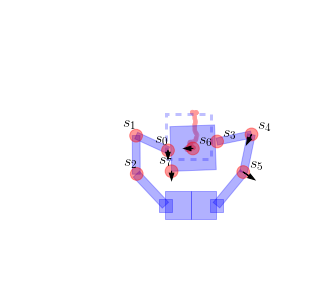

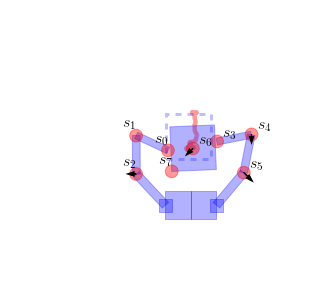

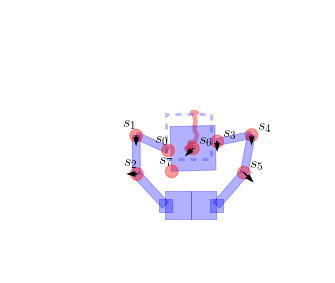

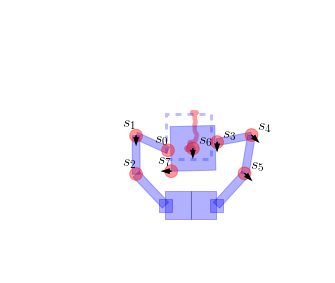

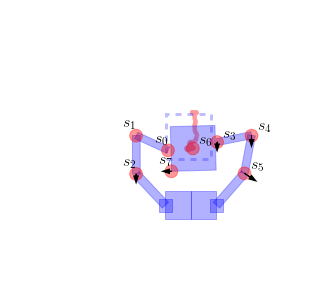

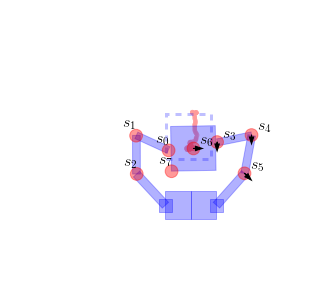

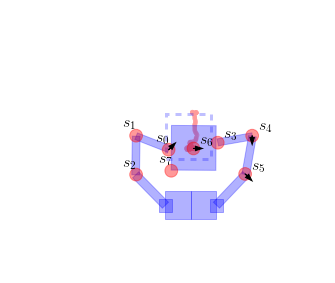

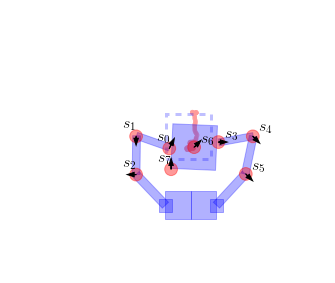

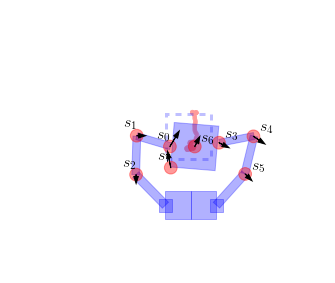

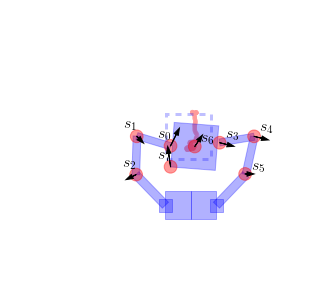

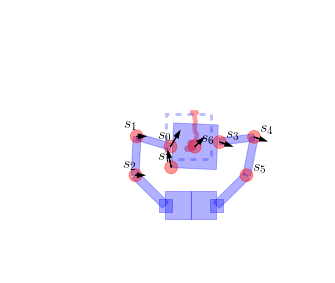

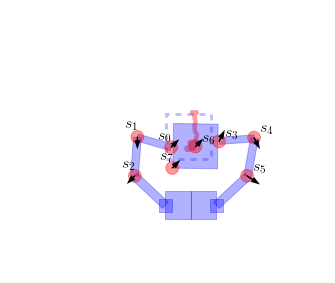

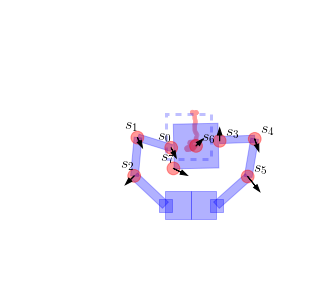

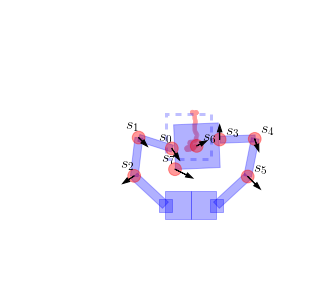

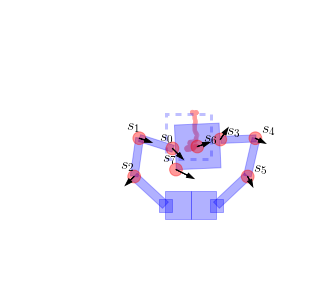

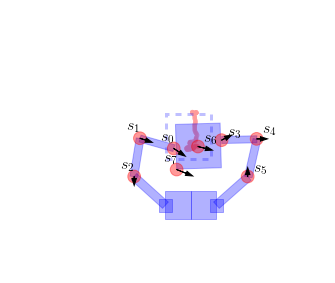

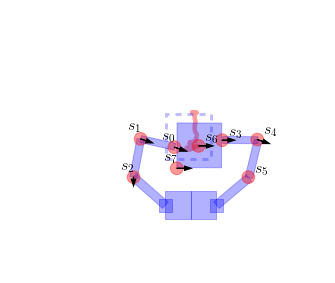

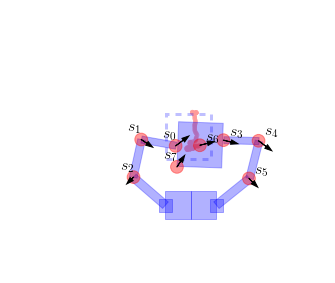

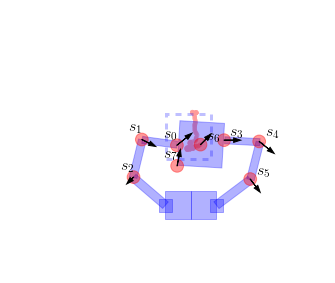

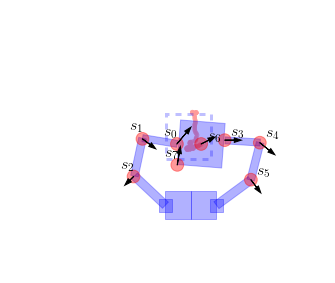

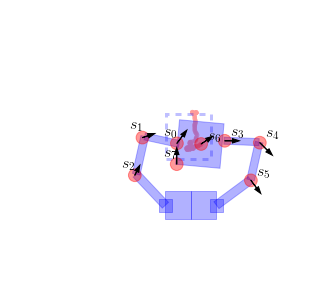

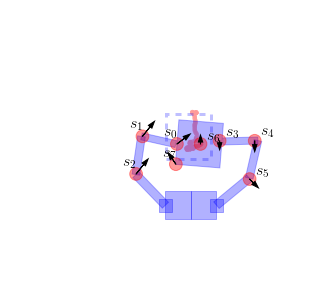

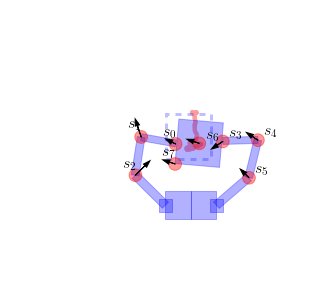

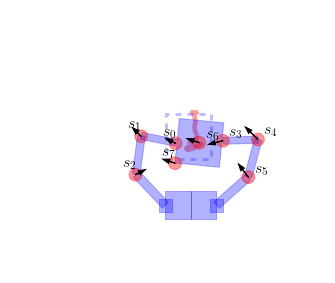

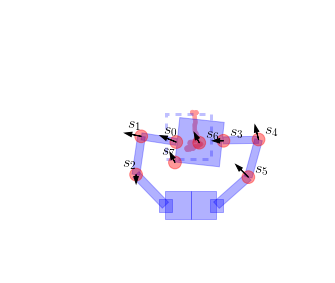

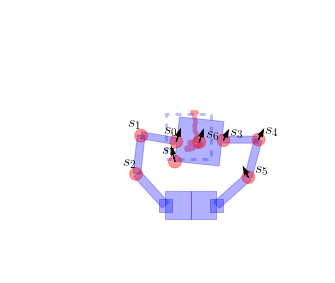

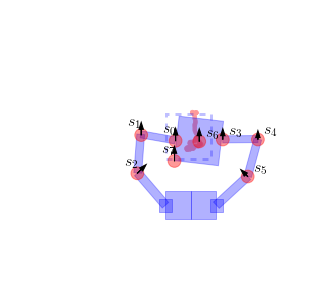

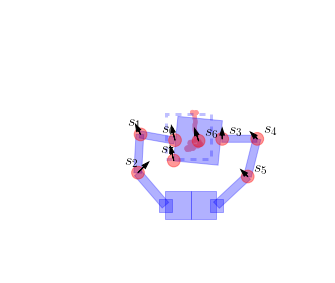

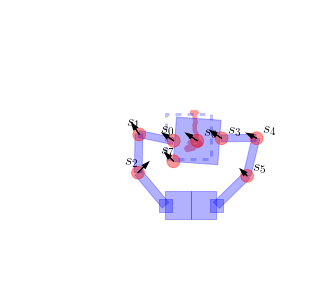

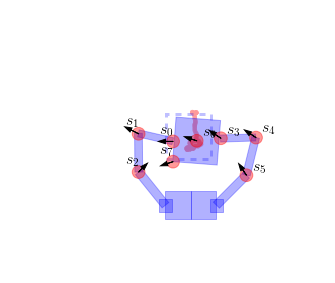

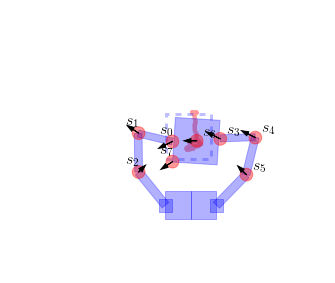

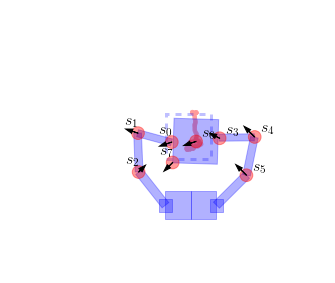

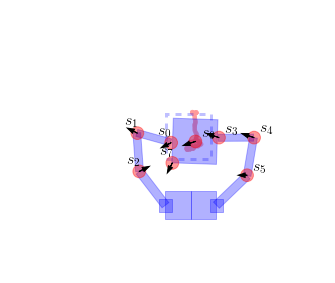

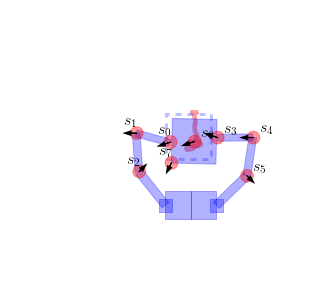

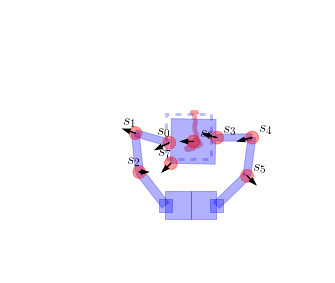

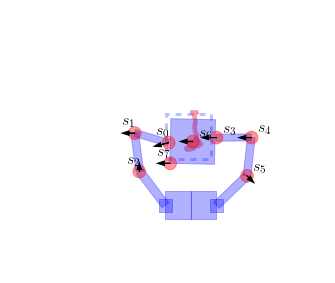

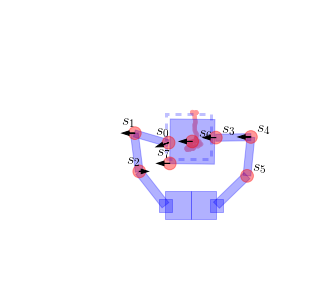

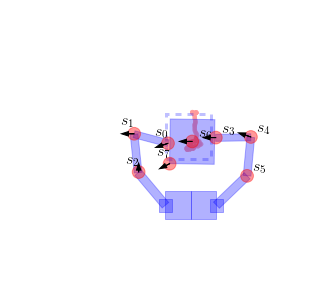

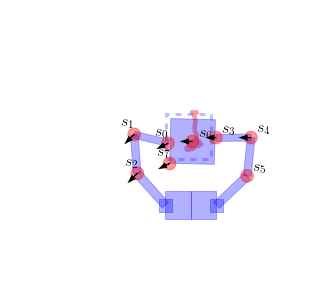

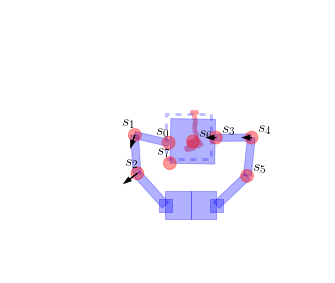

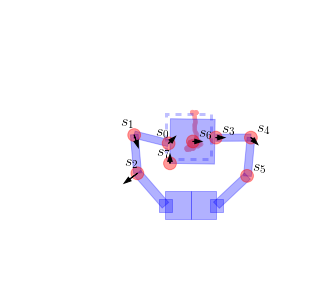

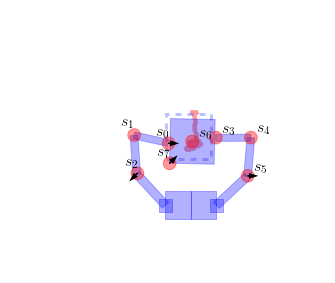

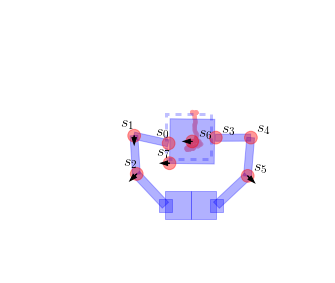

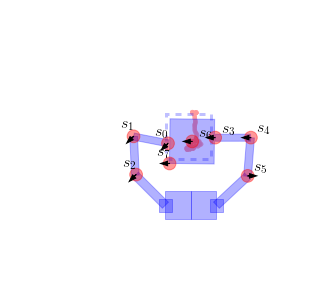

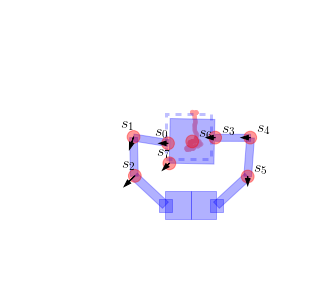

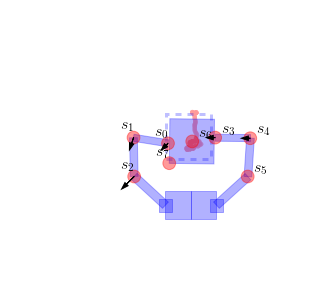

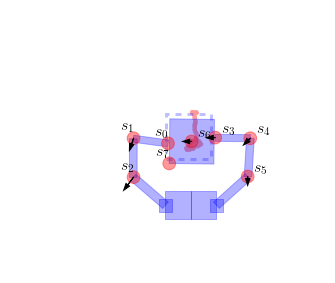

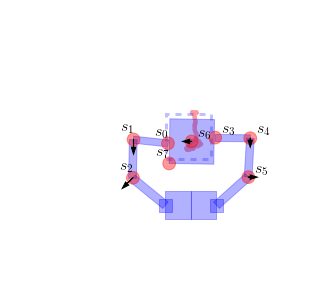

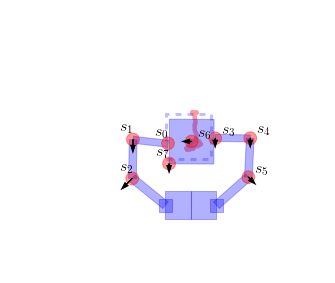

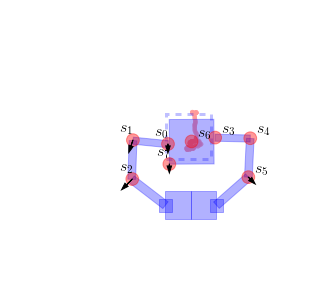

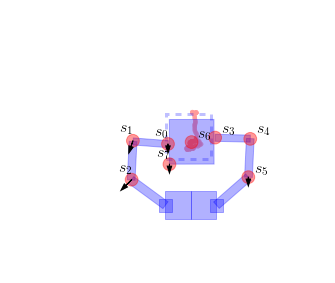

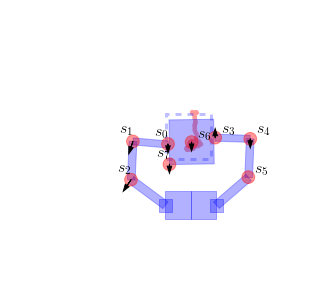

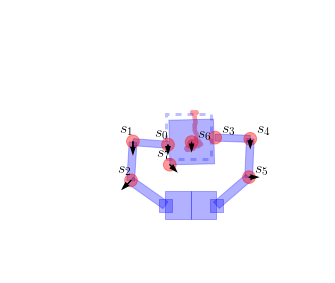

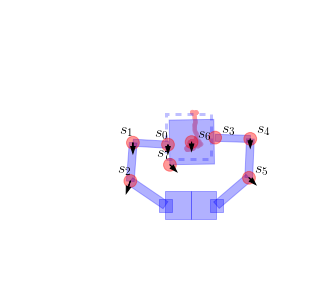

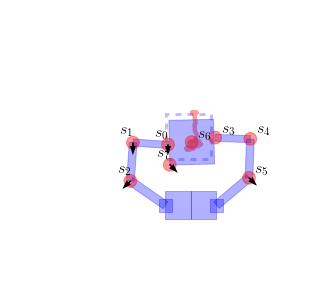

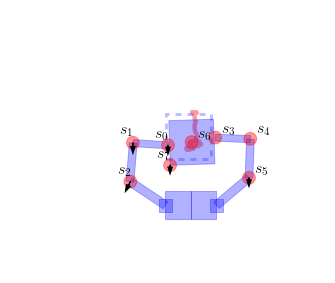

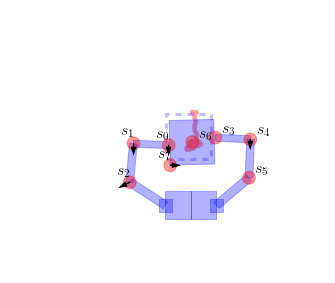

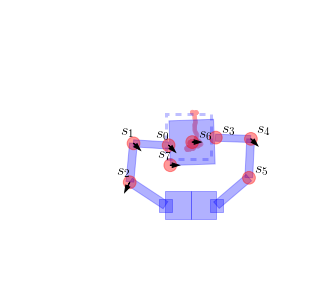

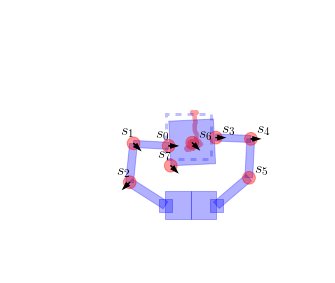

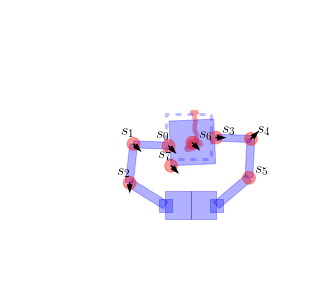

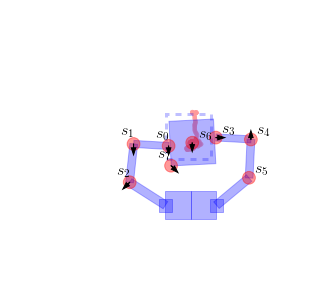

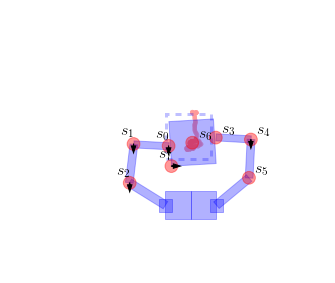

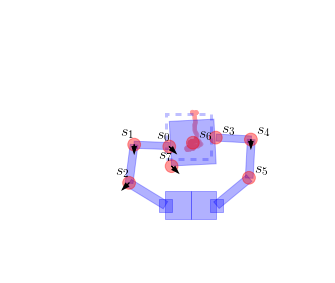

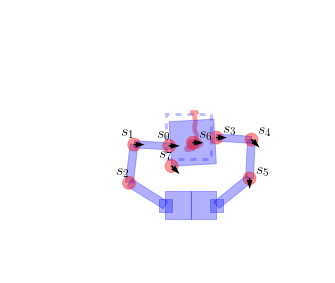

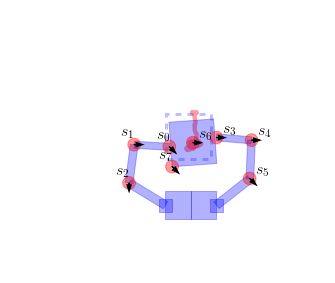

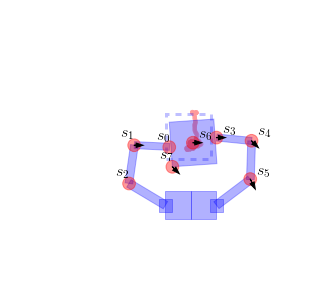

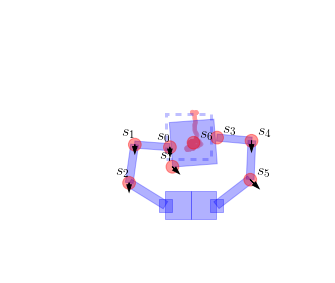

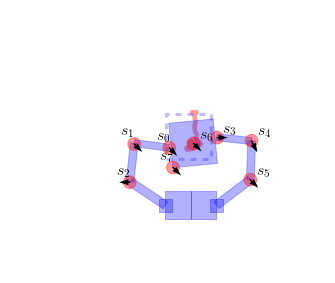

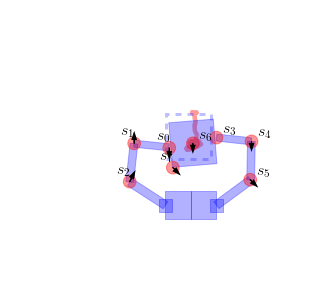

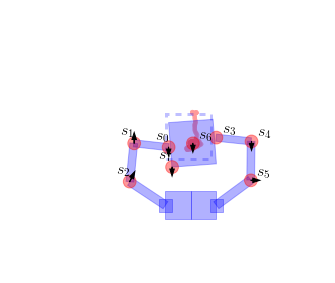

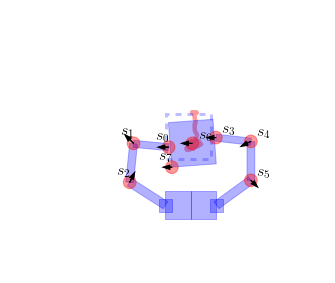

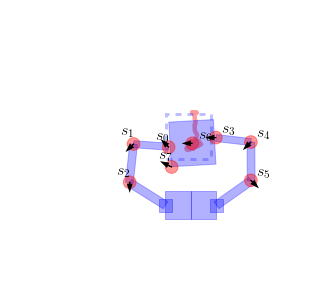

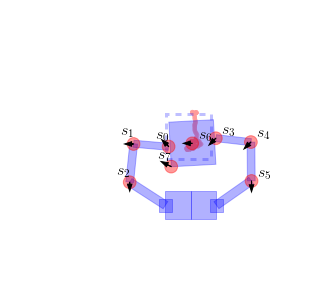

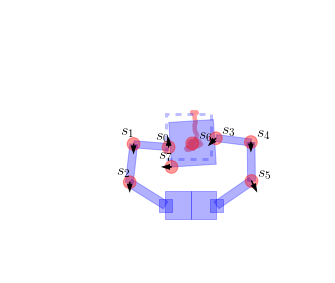

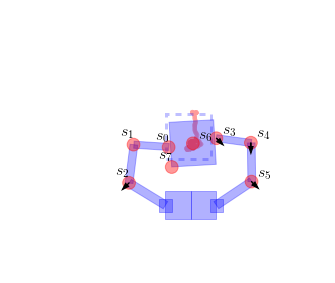

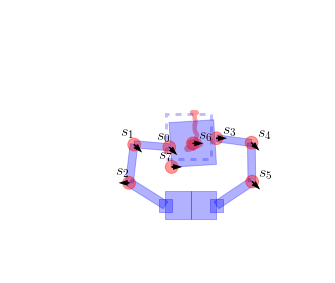

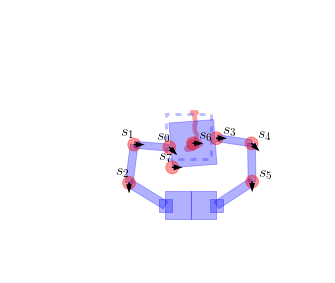

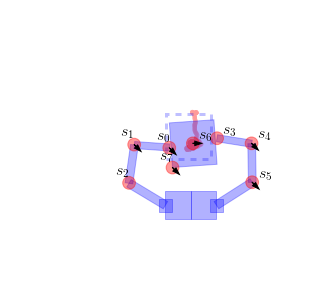

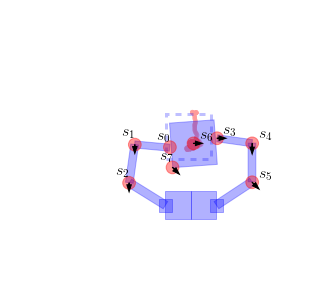

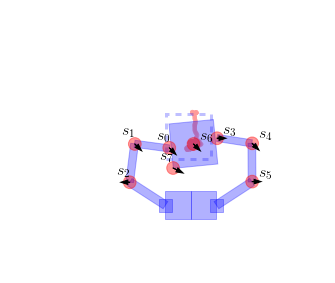

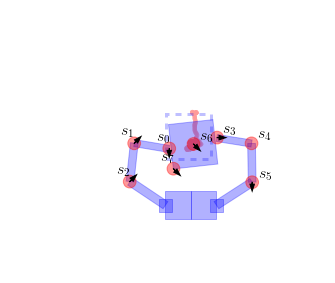

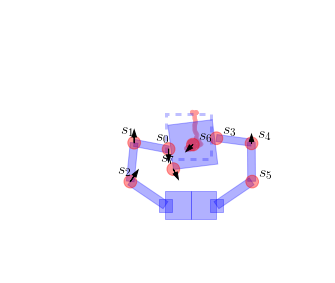

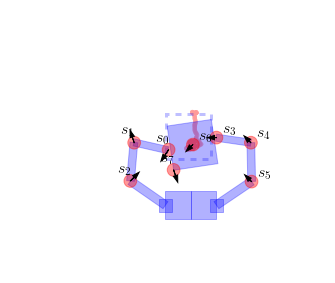

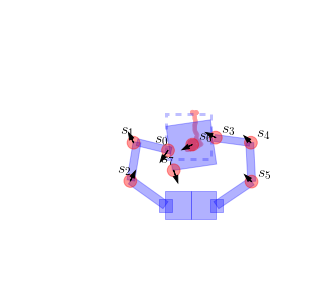

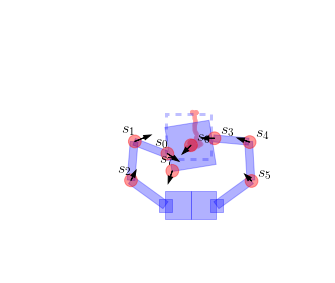

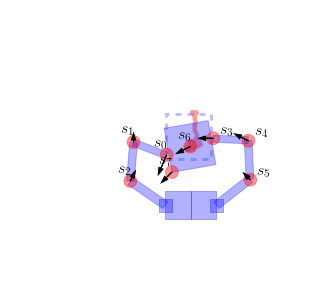

 .

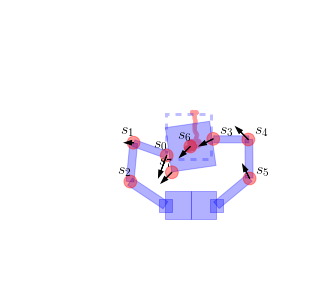

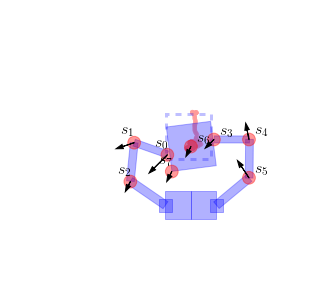

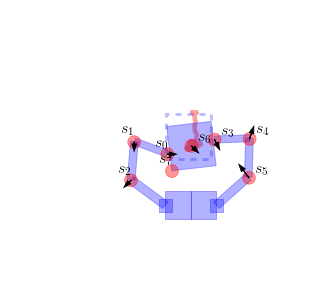

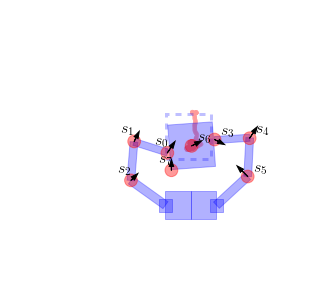

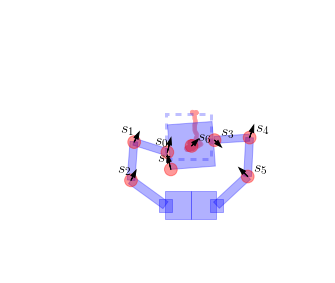

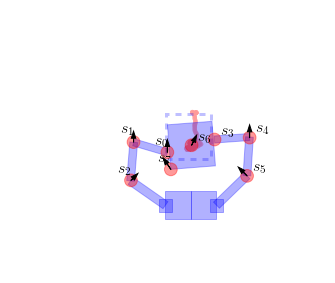

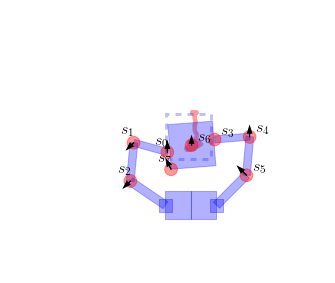

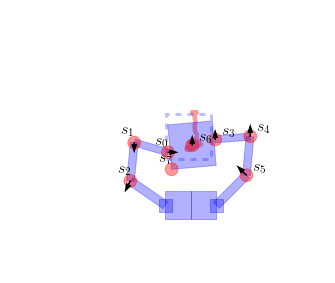

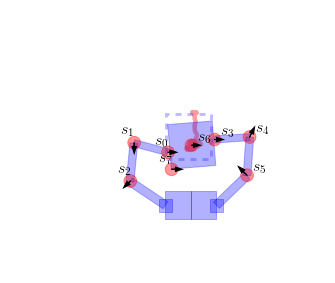

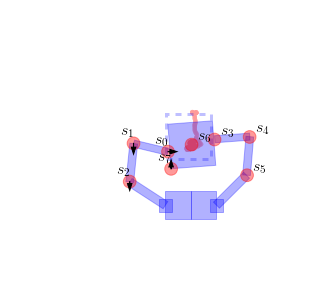

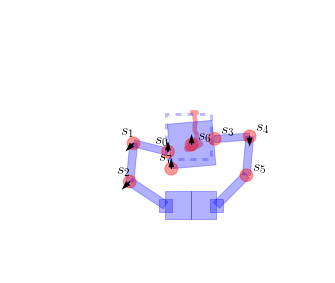

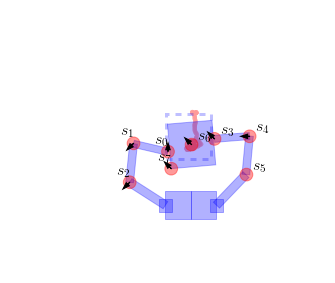

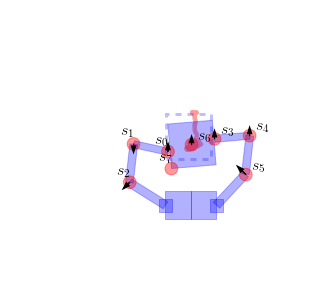

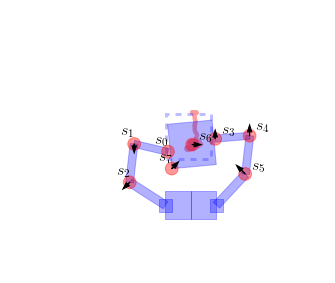

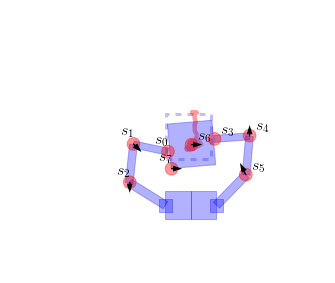

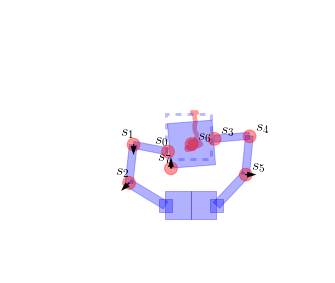

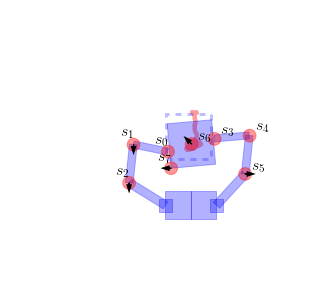

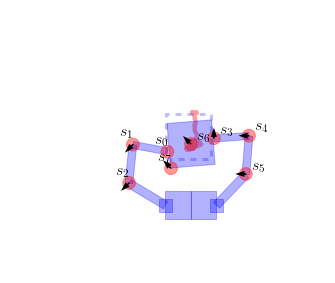

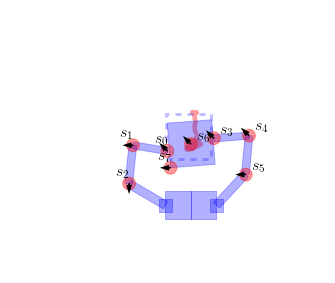

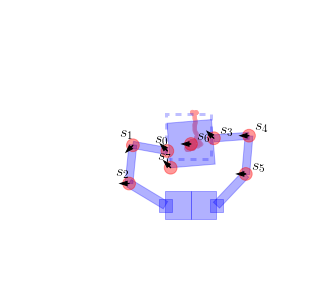

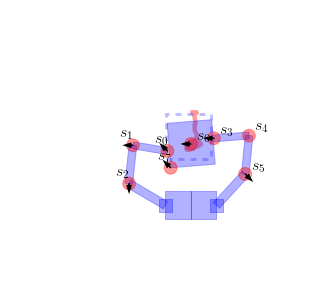

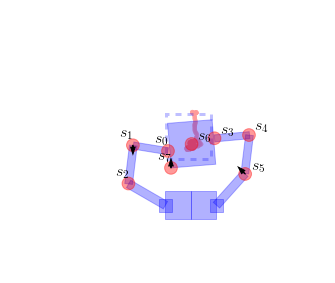

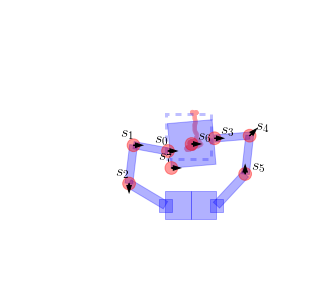

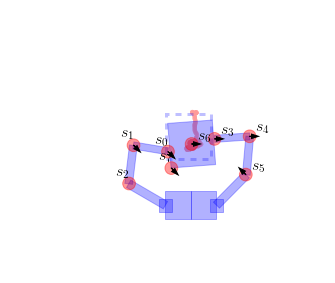

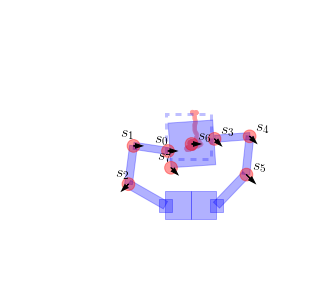

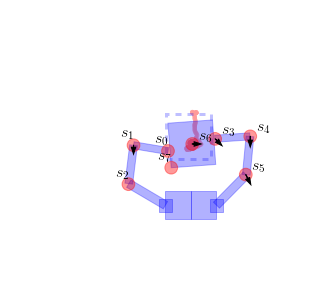

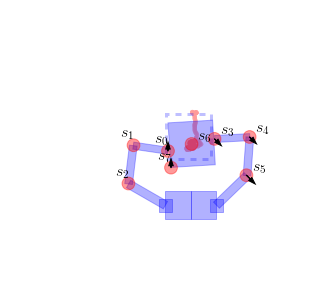

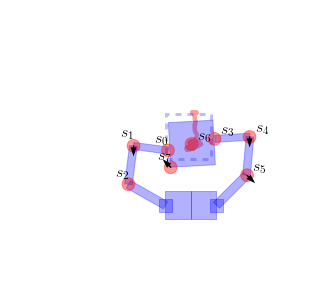

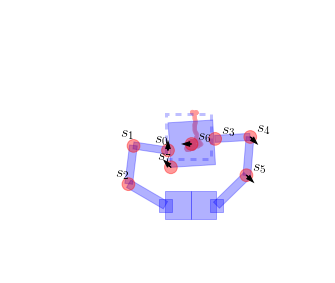

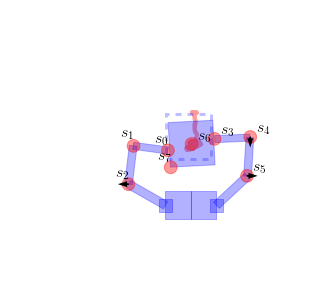

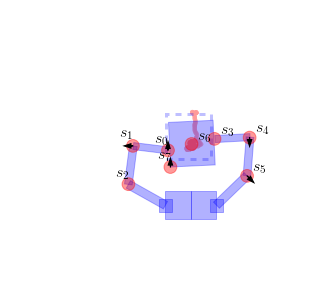

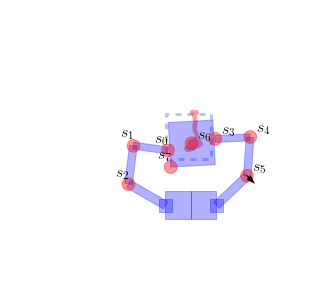

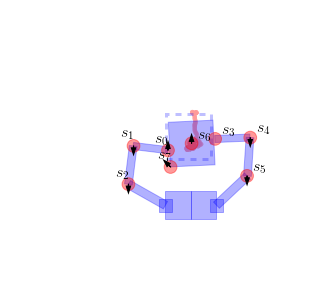

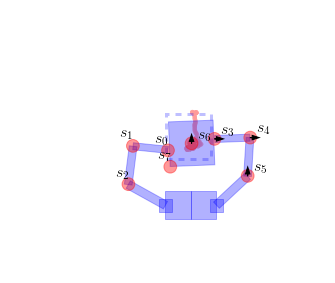

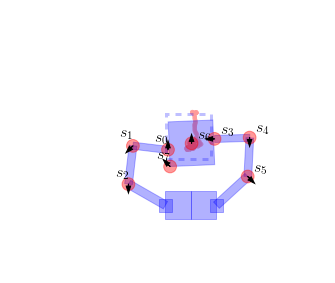

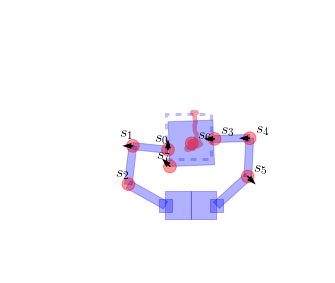

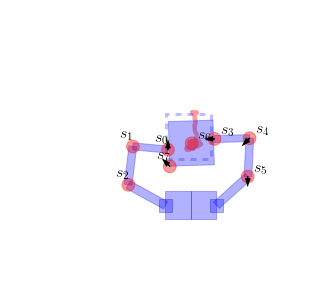

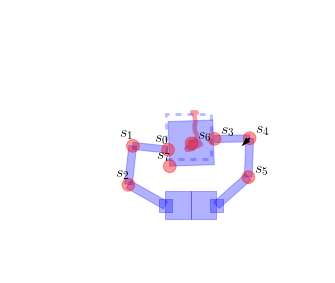

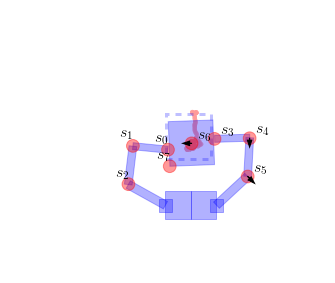

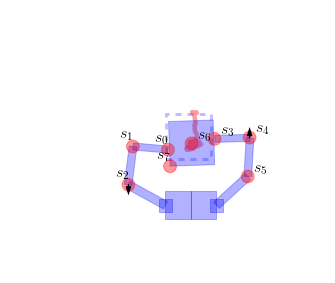

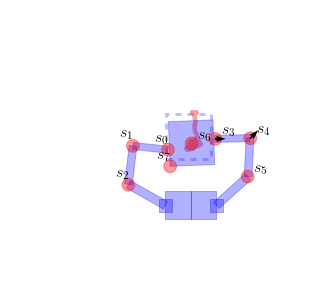

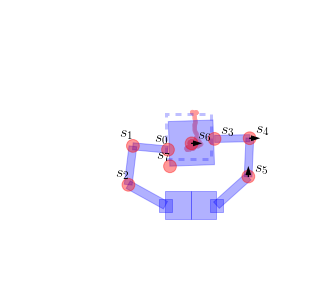

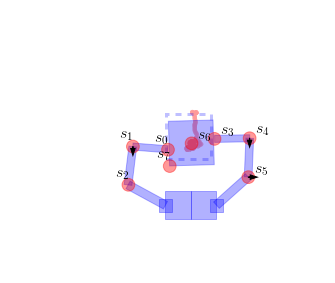

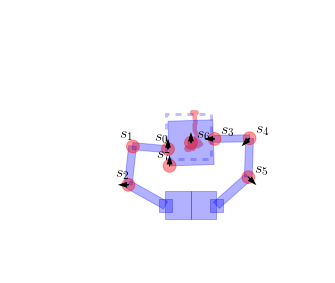

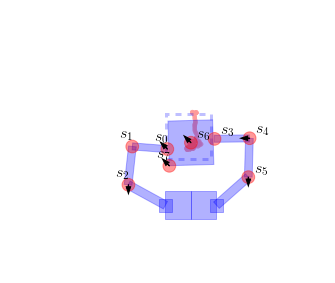

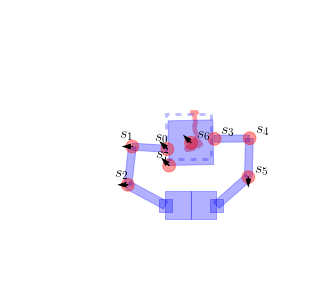

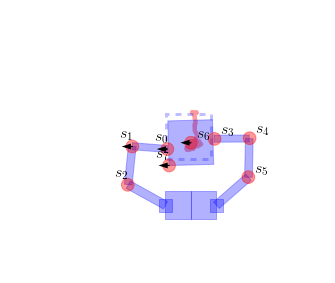

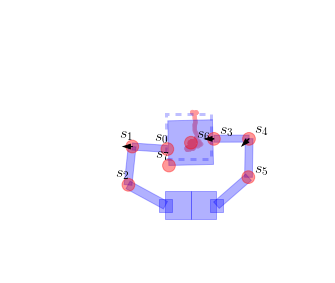

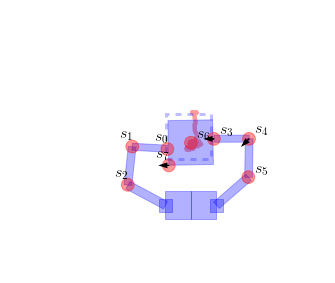

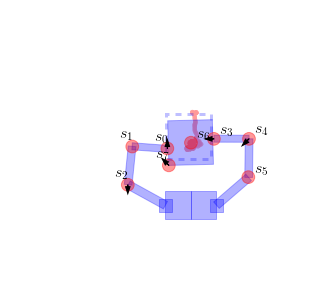

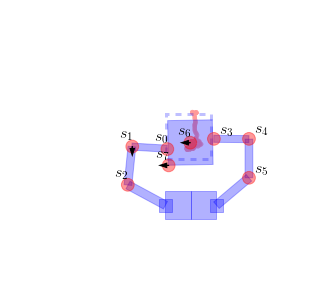

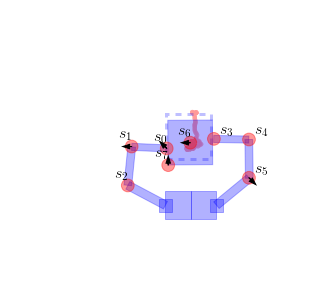

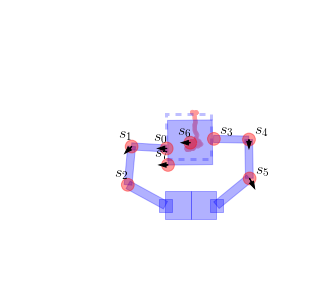

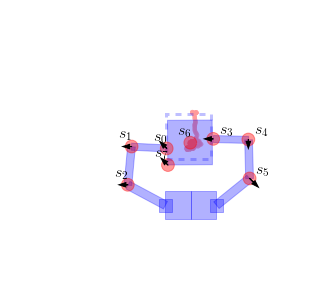

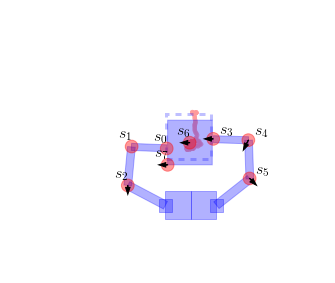

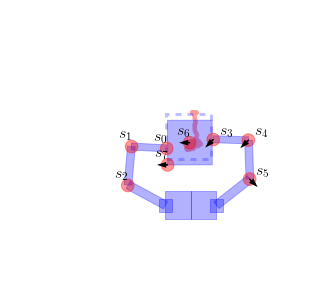

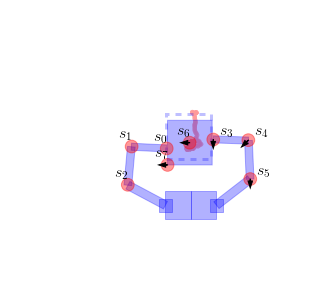

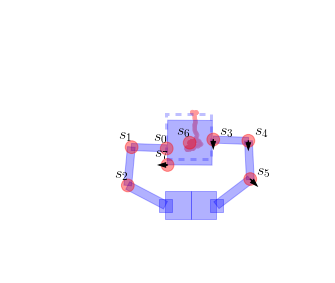

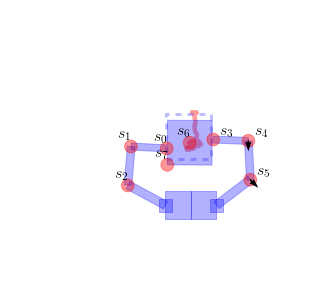

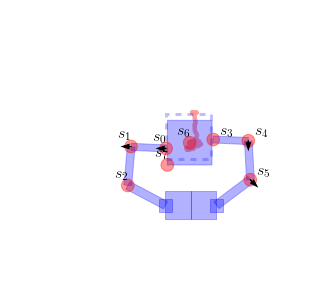

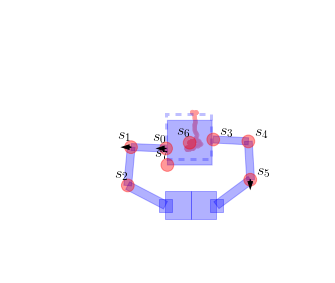

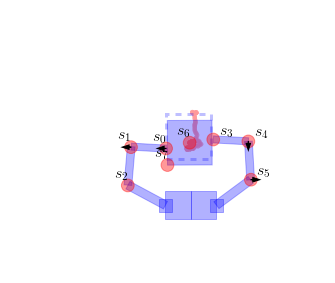

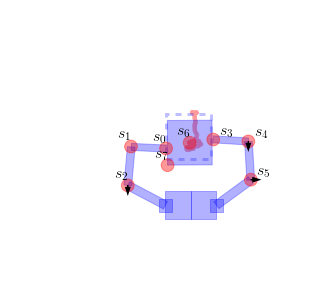

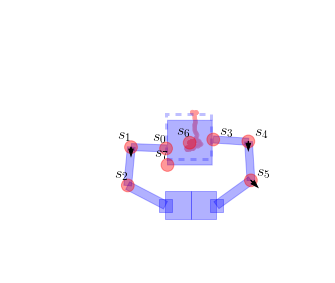

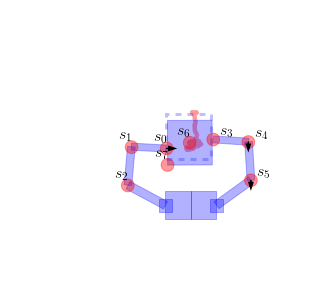

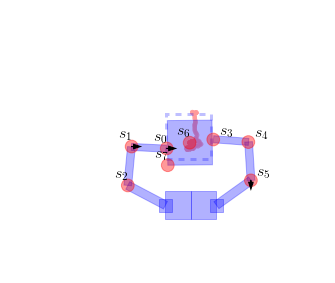

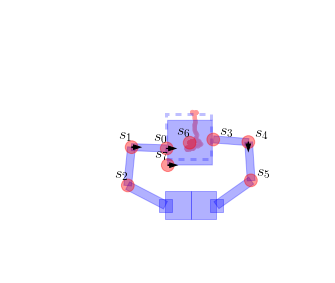

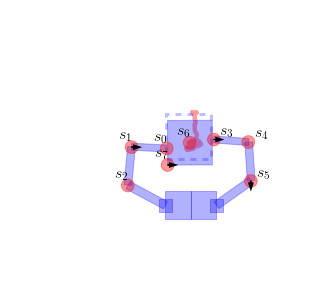

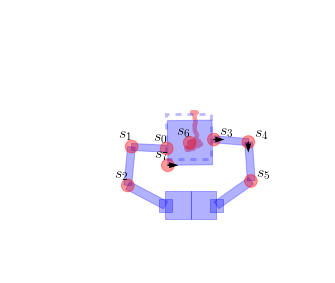

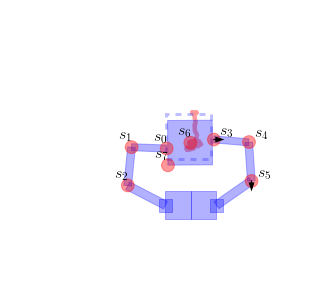

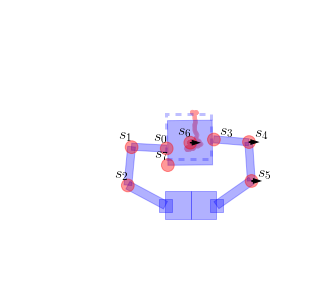

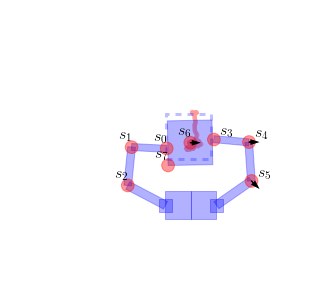

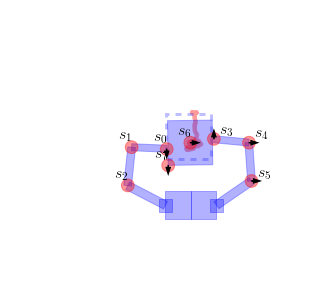

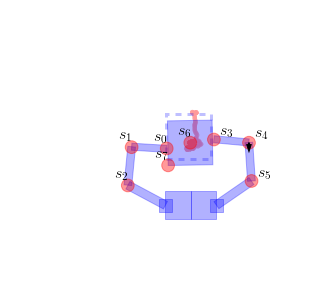

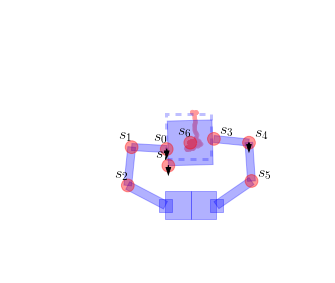

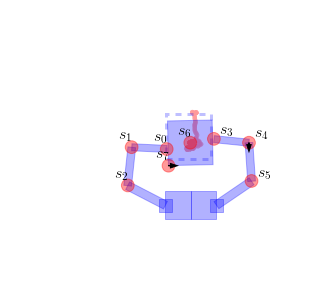

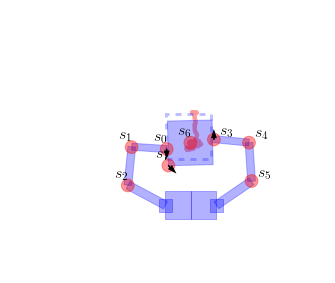

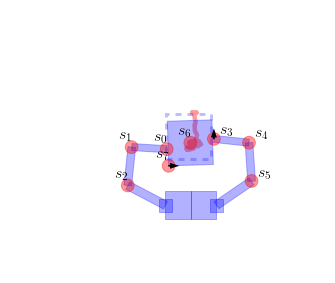

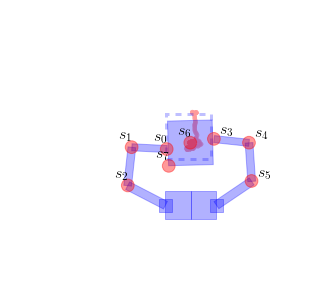

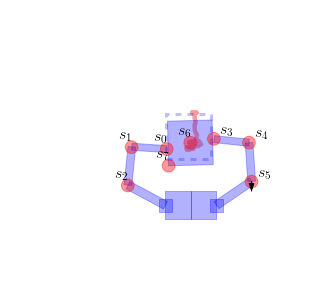

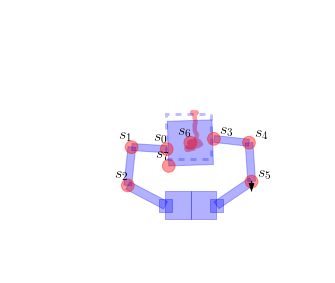

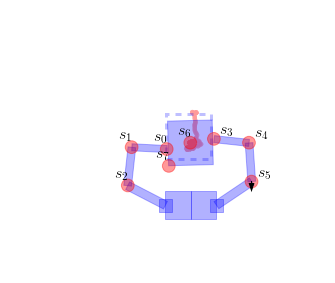

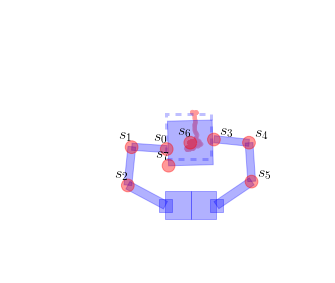

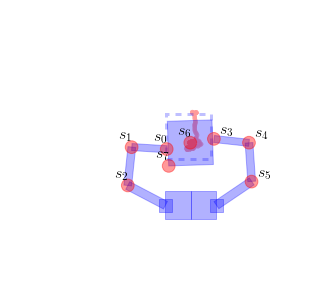

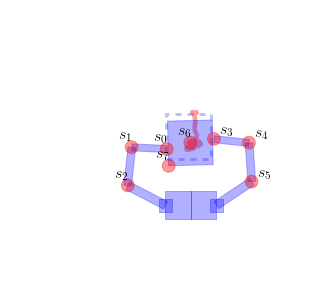

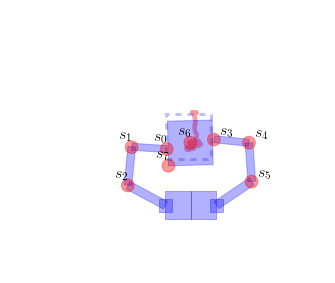

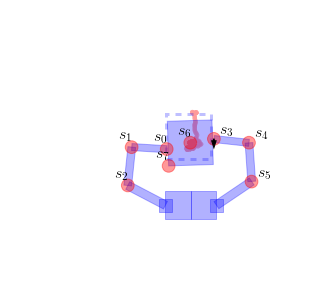

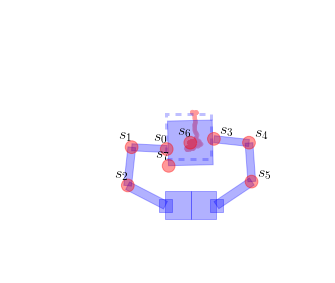

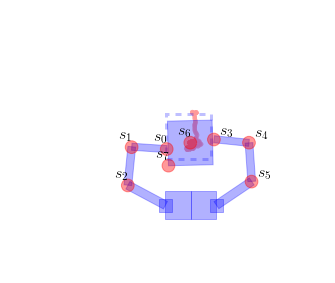

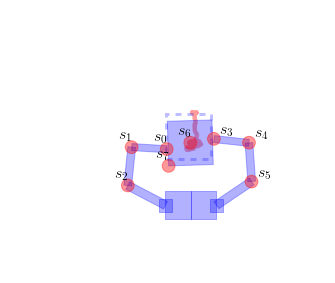

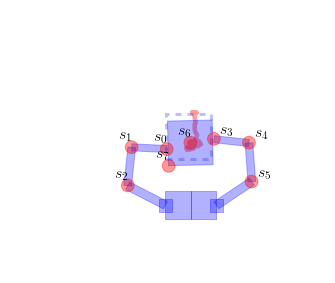

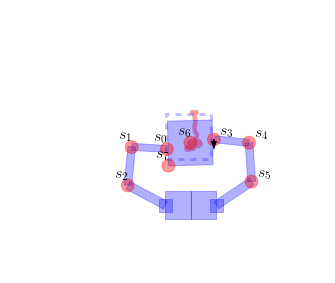

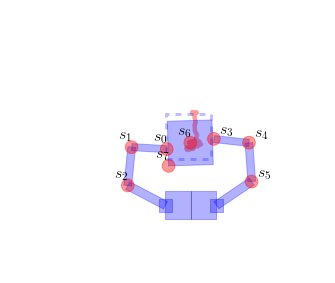

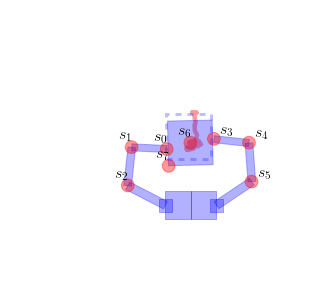

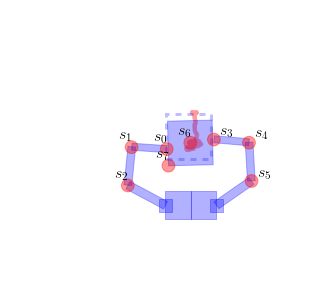

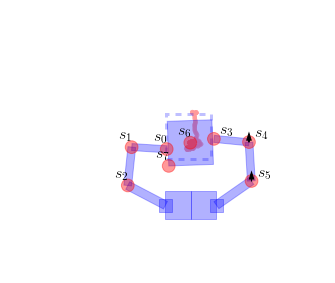

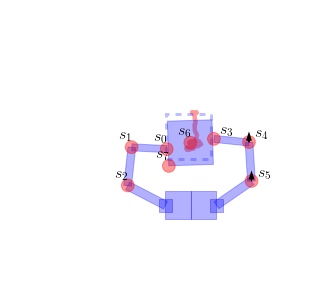

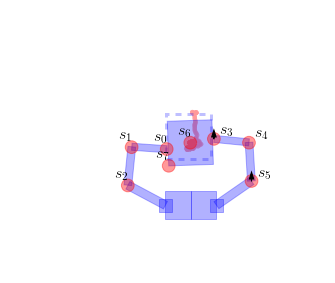

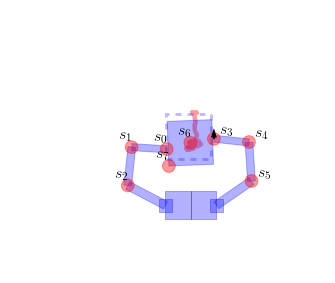

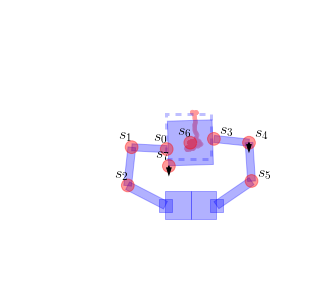

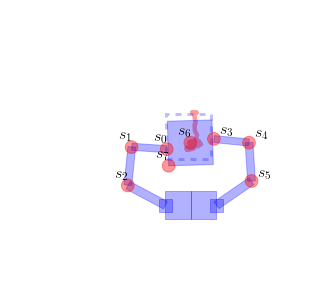

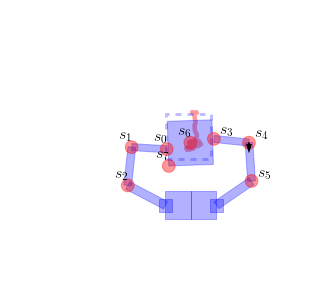

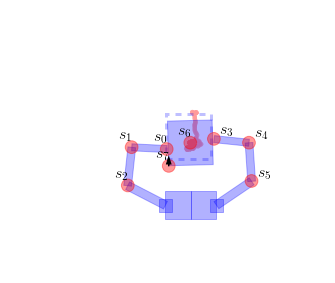

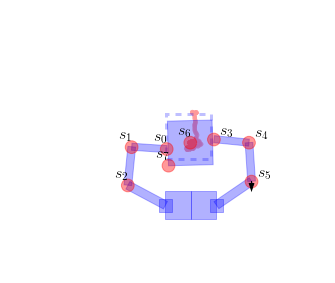

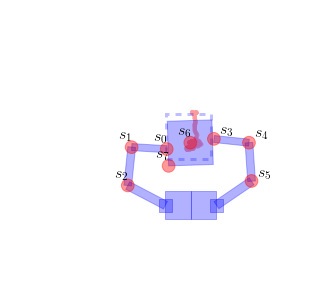

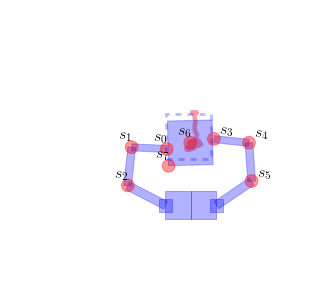

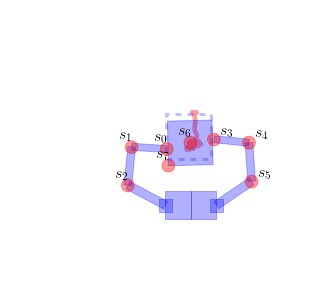

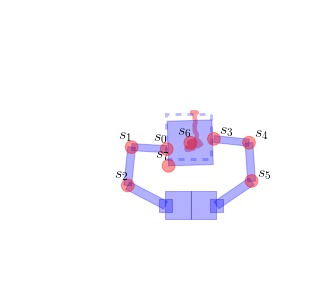

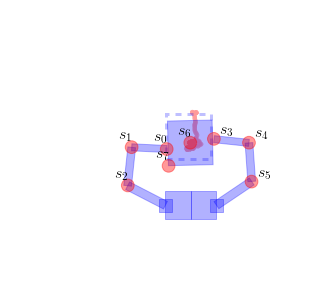

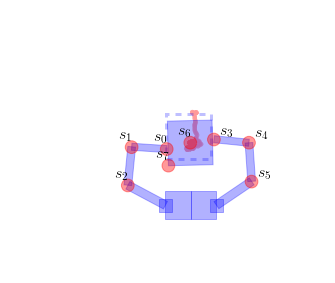

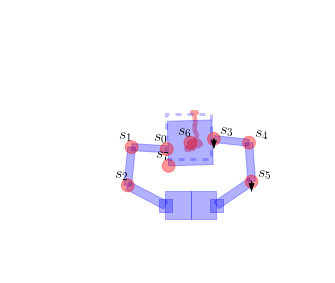

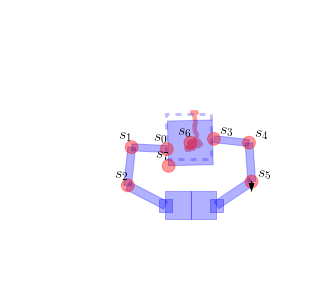

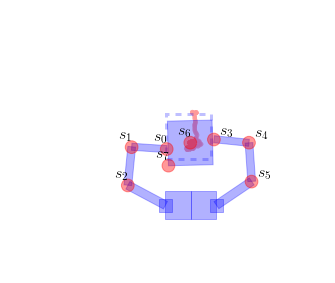

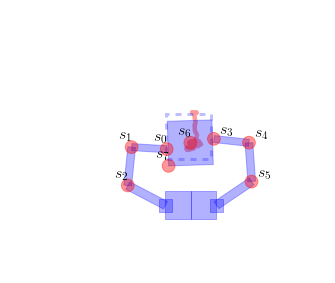

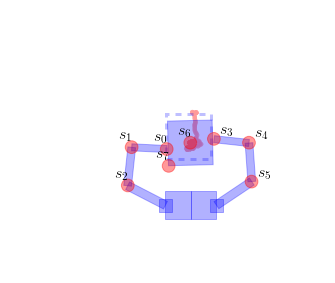

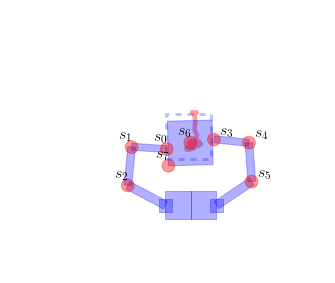

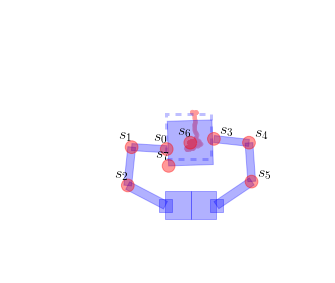

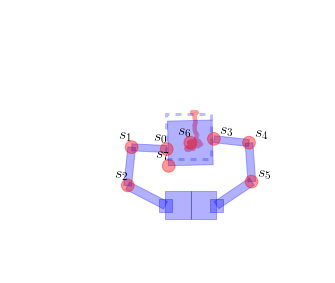

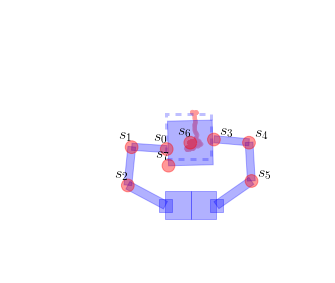

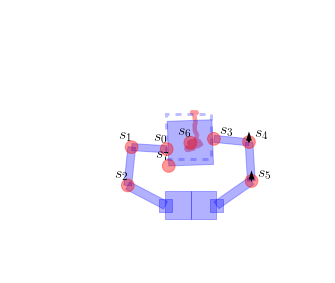

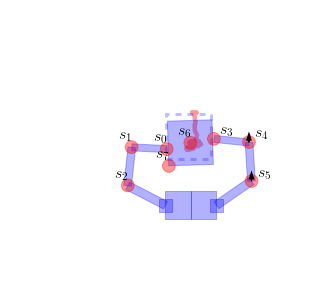

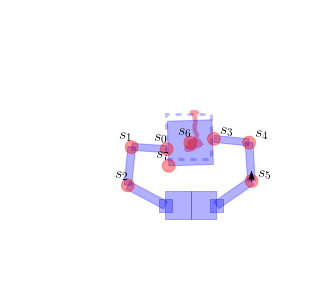

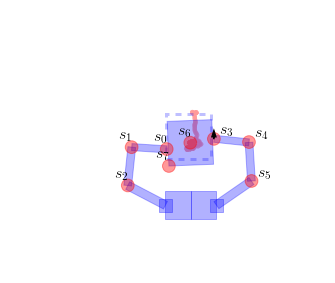

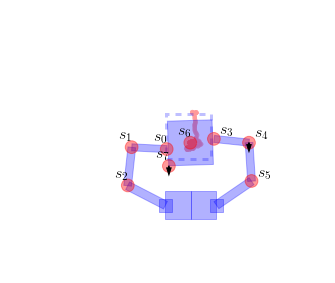

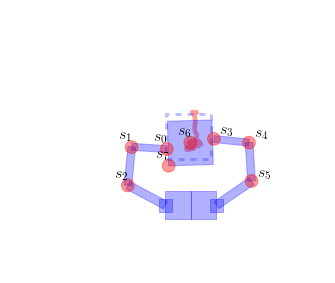

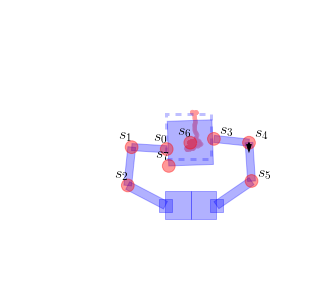

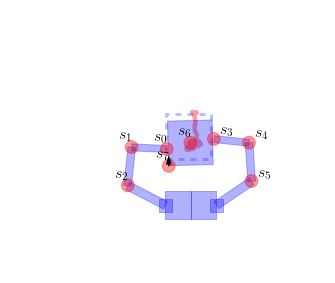

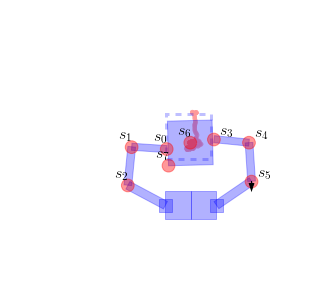

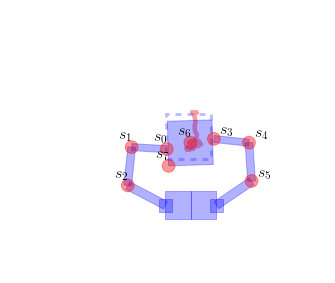

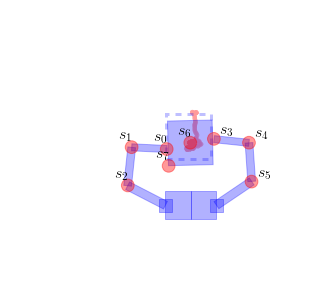

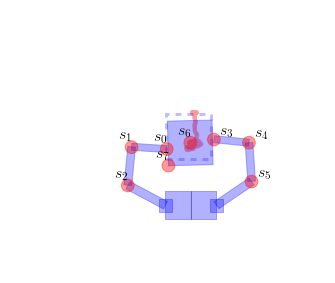

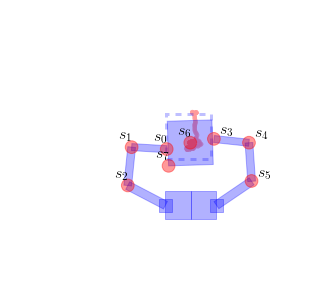

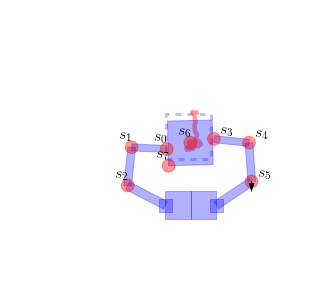

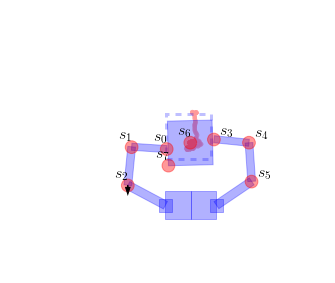

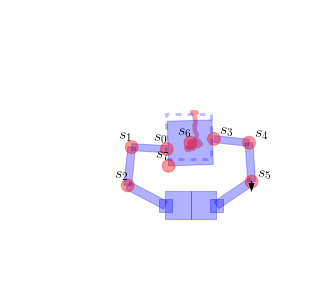

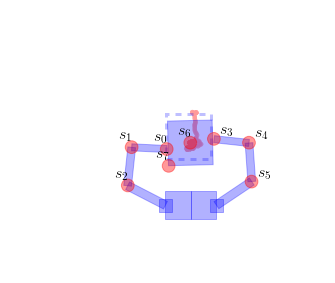

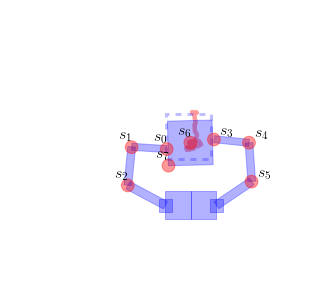

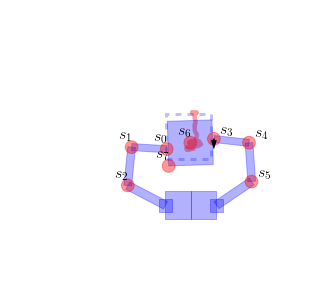

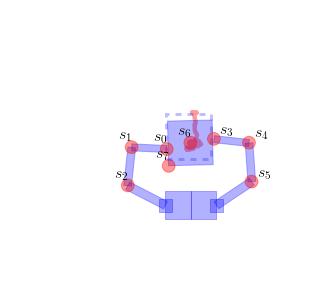

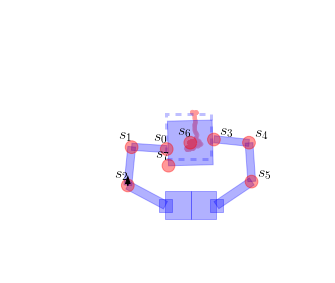

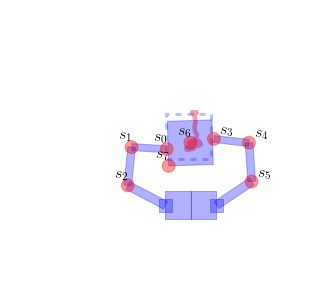

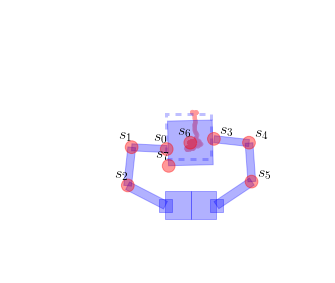

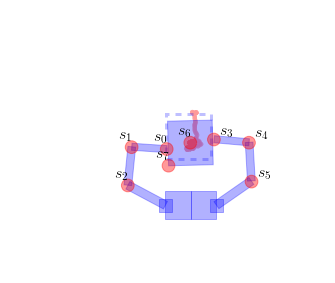

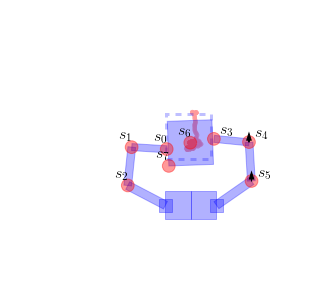

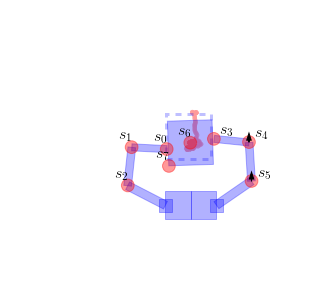

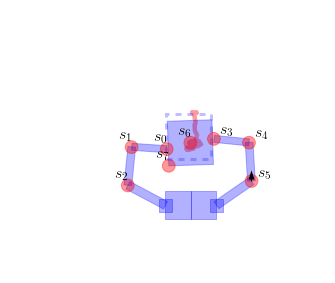

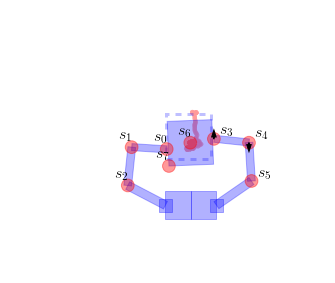

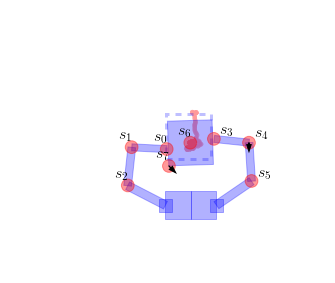

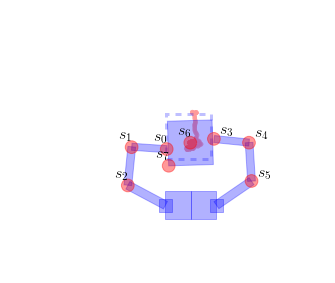

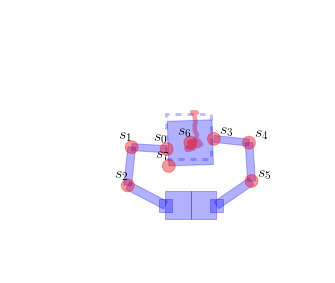

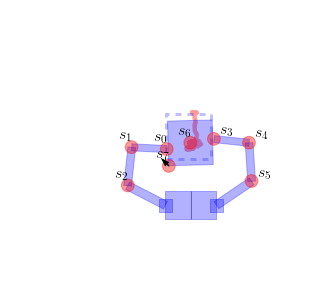

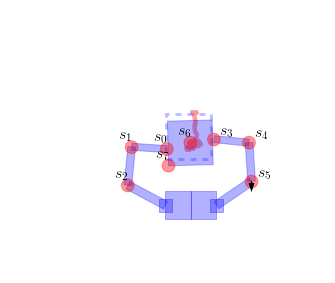

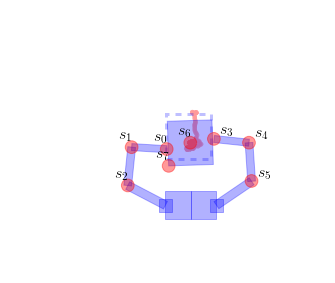

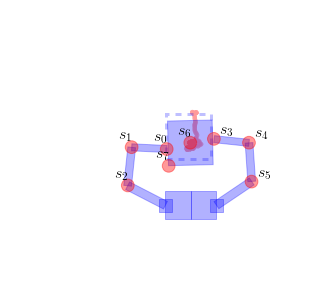

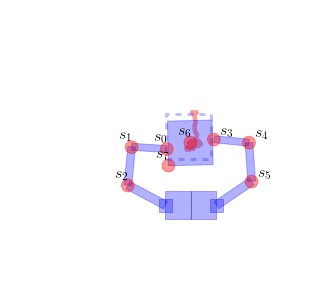

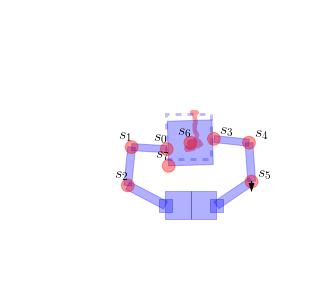

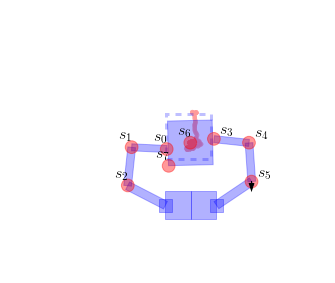

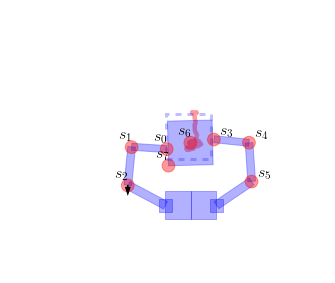

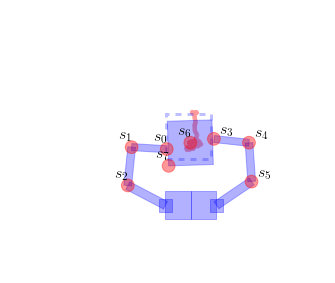

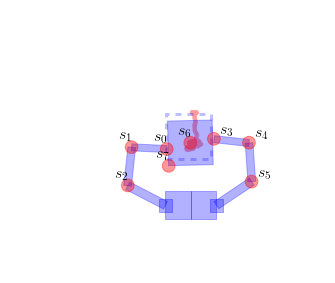

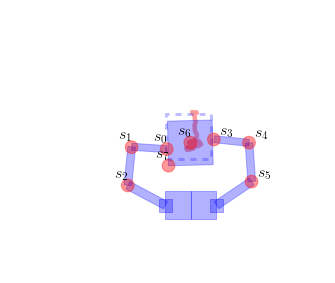

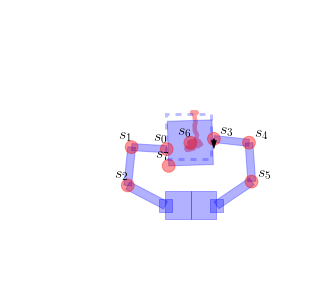

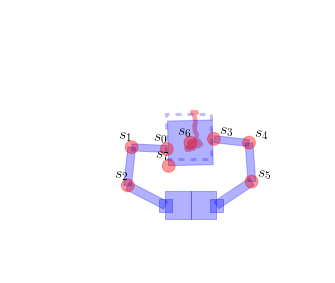

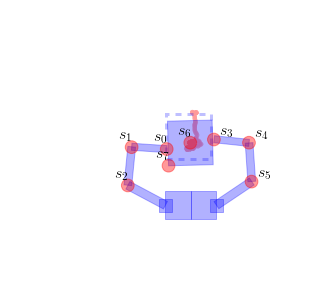

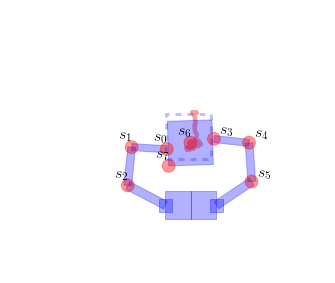

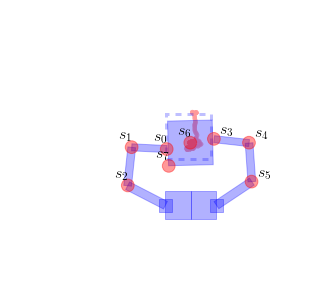

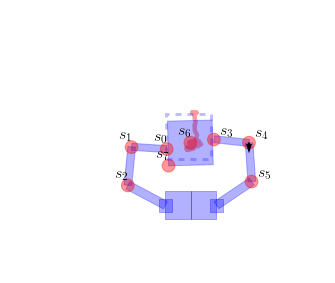

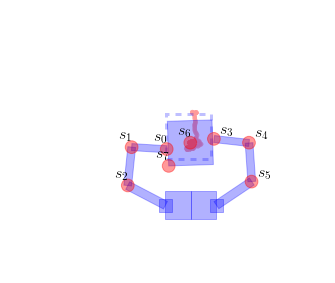

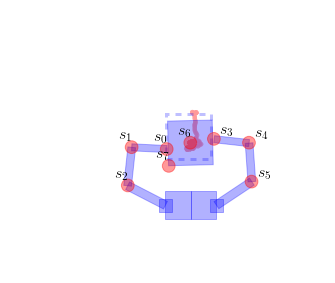

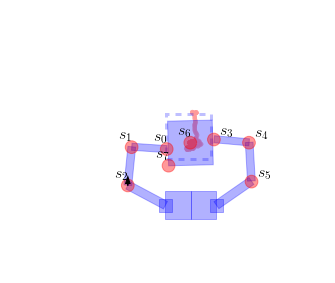

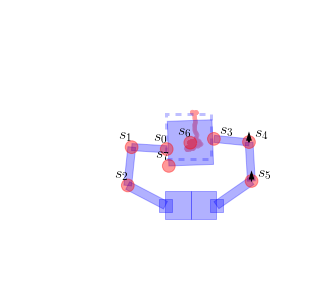

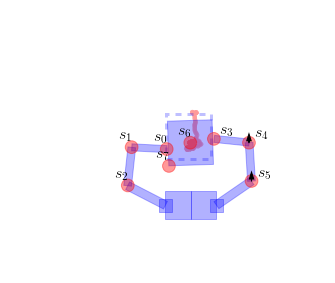

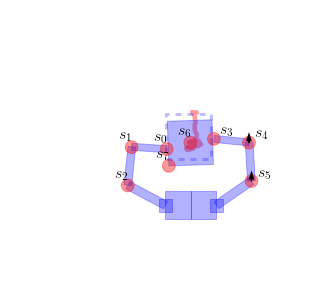

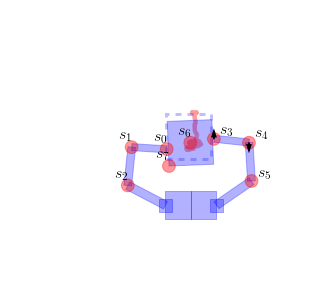

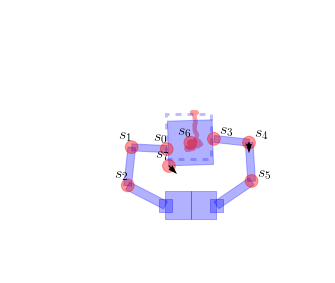

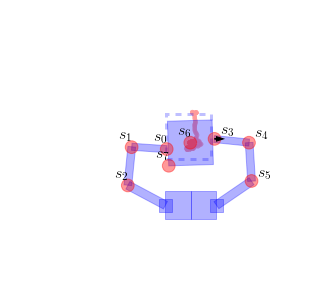

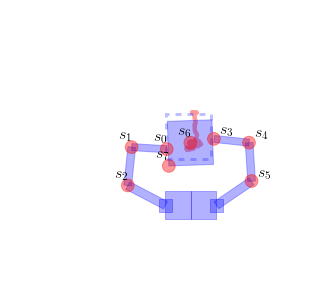

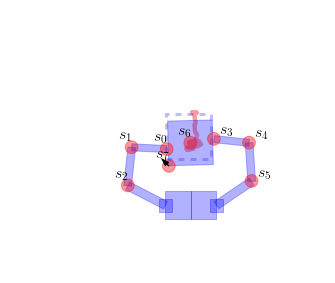

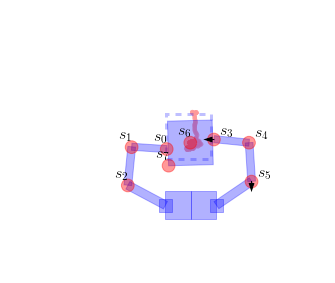

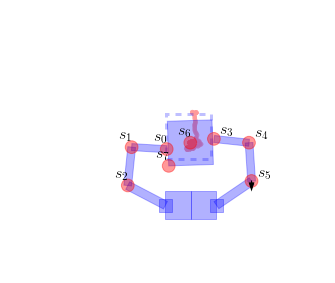

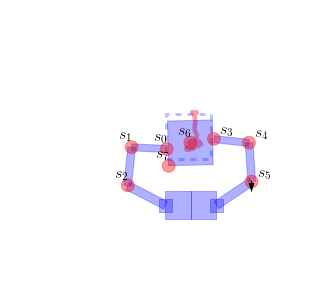

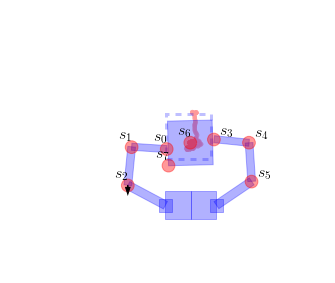

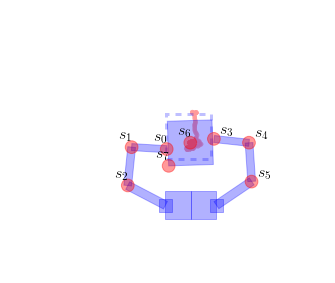

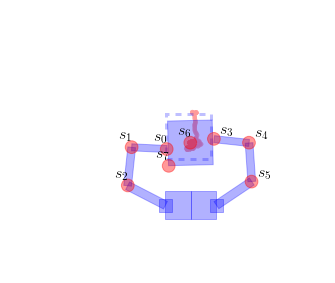

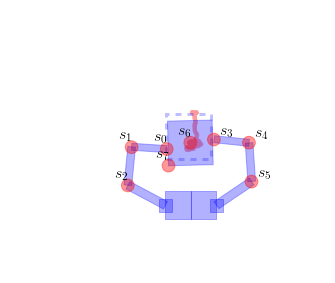

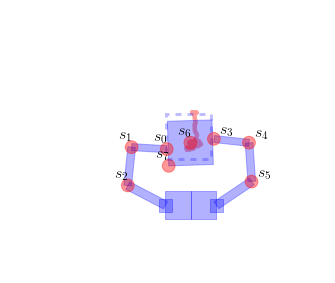

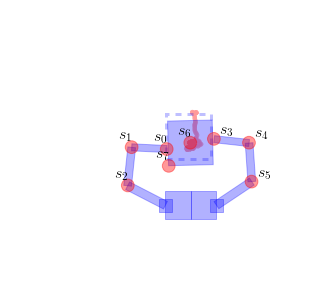

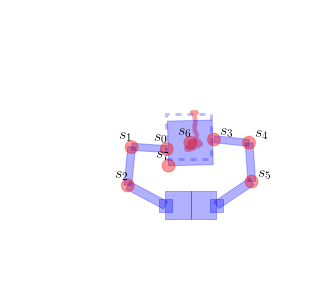

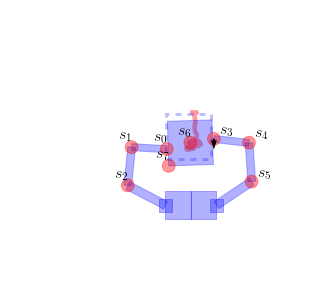

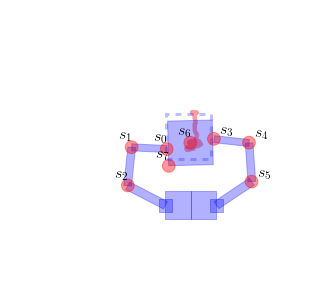

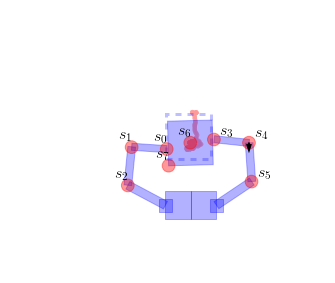

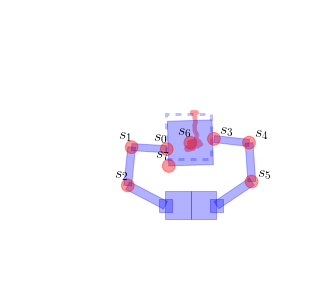

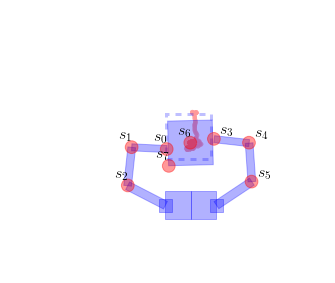

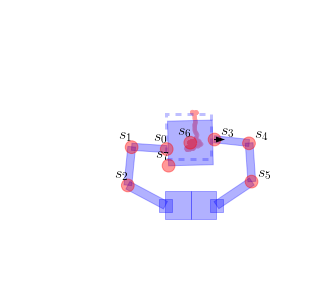

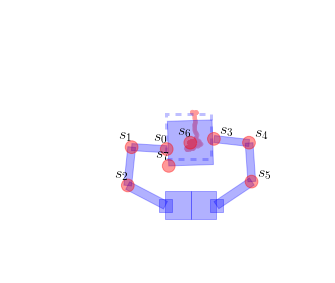

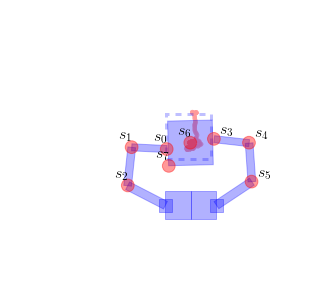

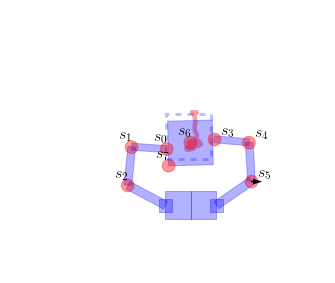

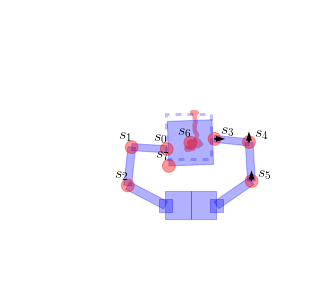

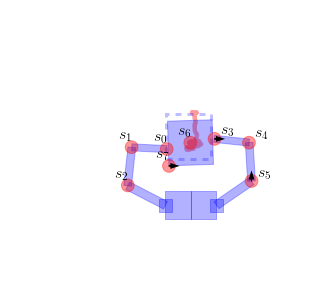

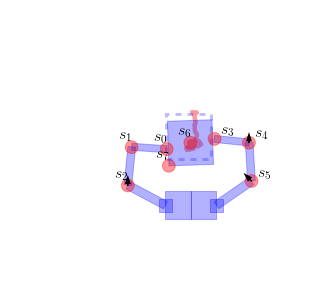

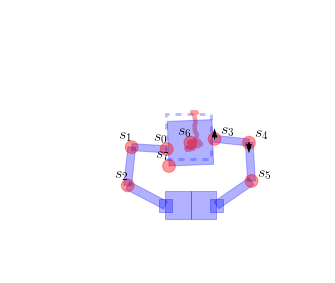

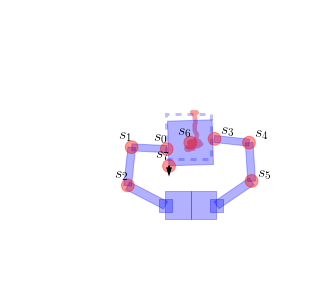

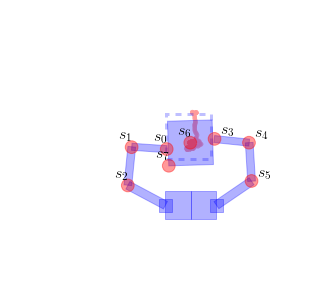

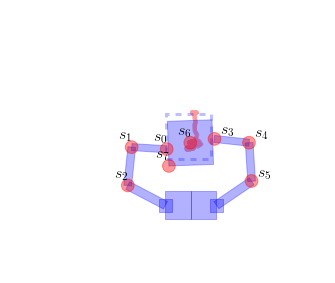

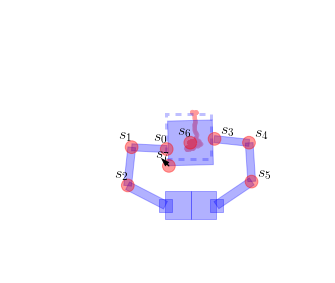

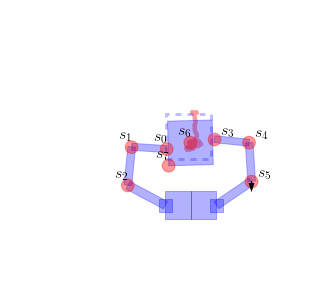

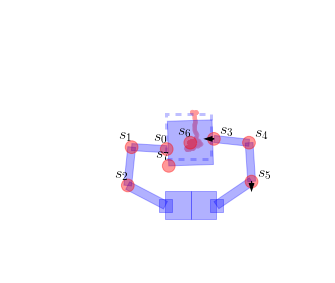

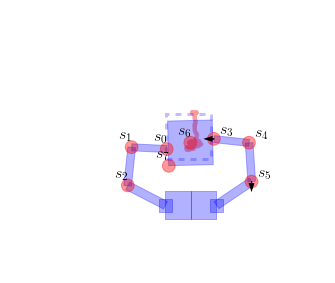

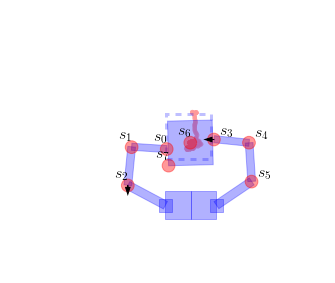

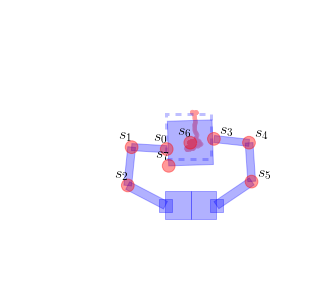

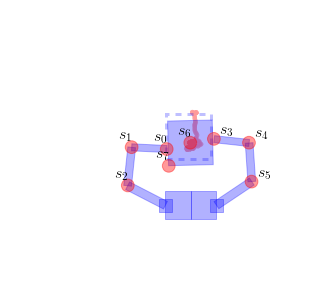

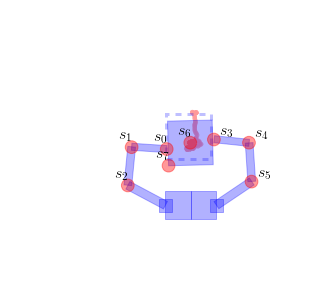

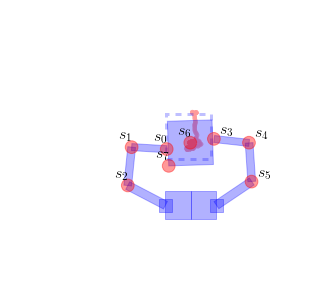

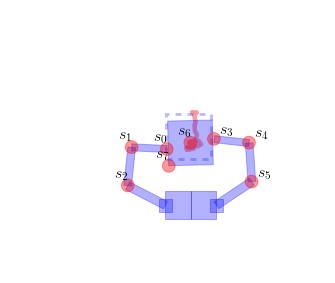

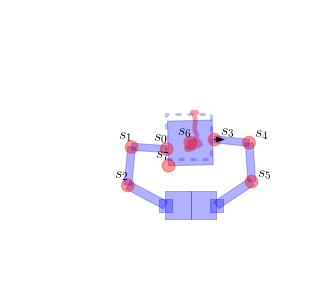

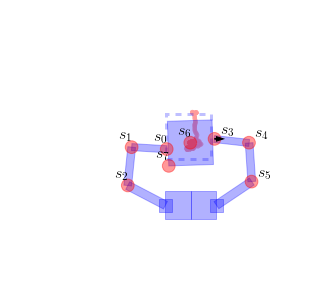

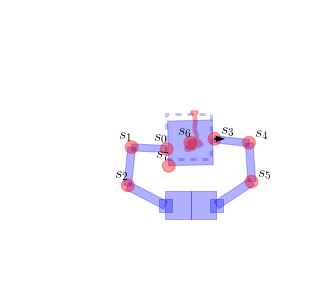

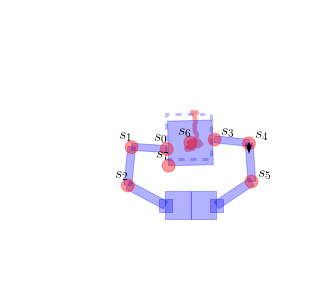

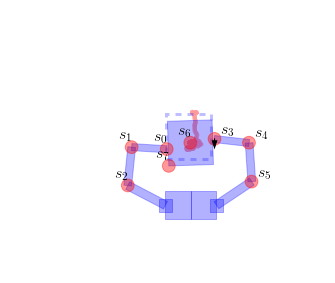

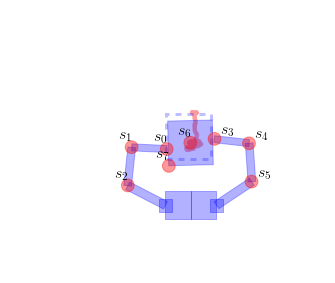

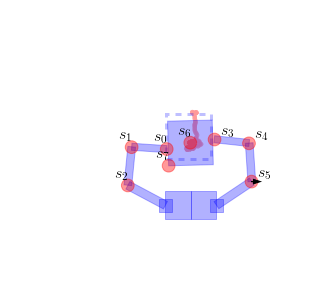

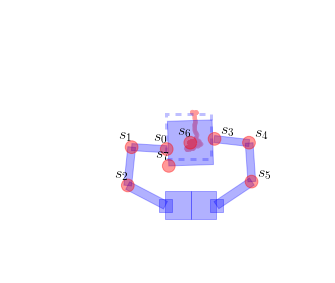

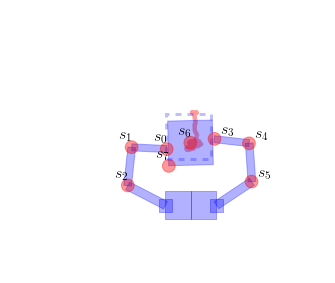

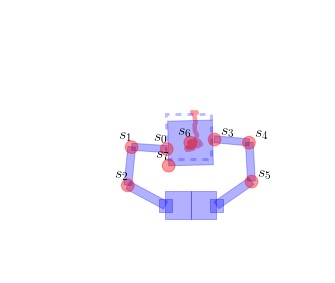

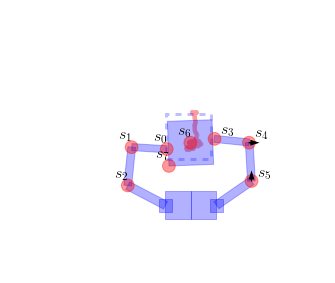

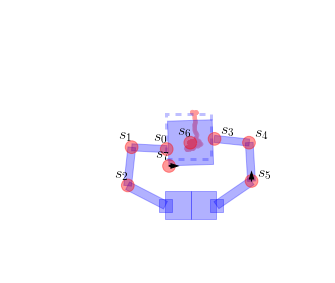

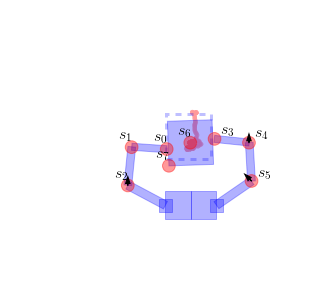

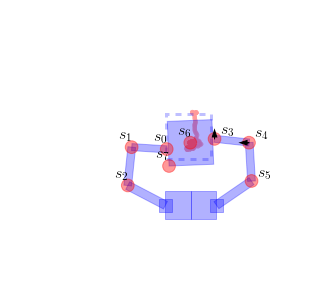

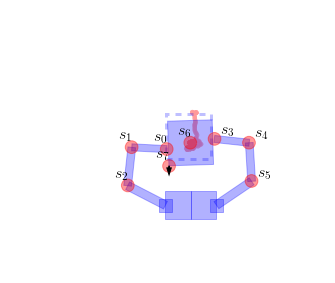

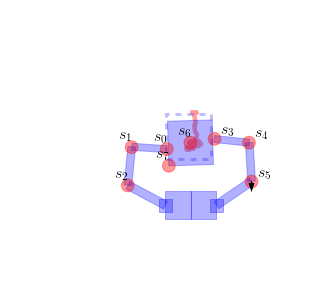

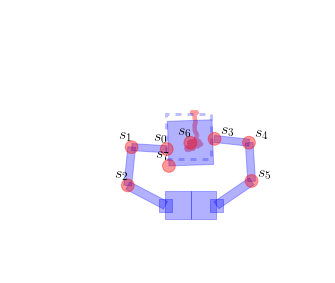

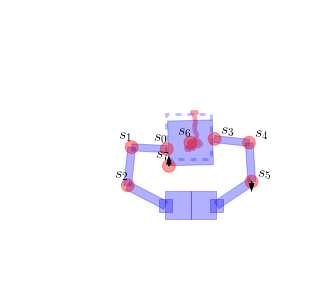

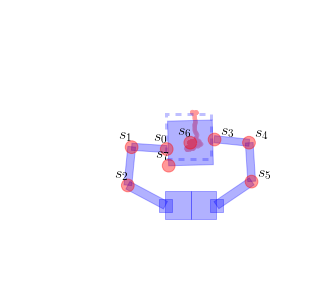

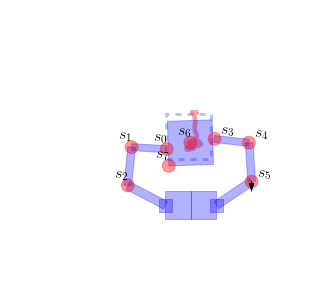

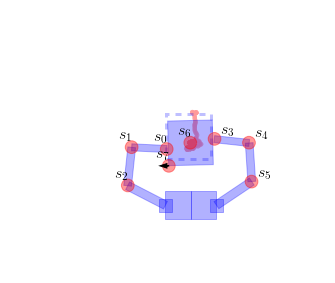

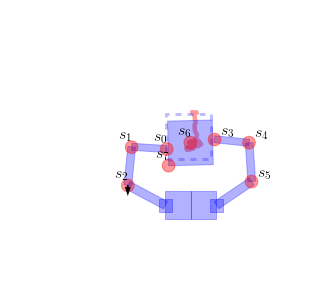

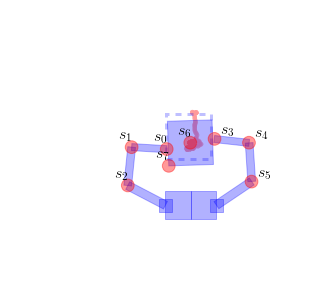

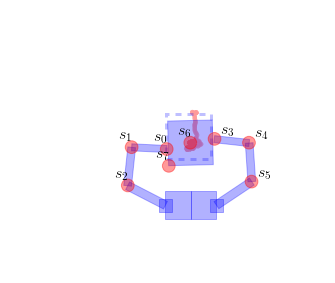

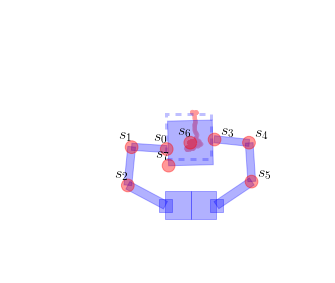

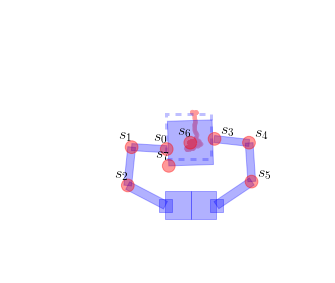

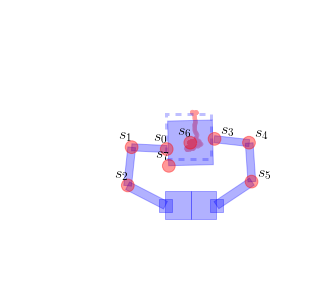

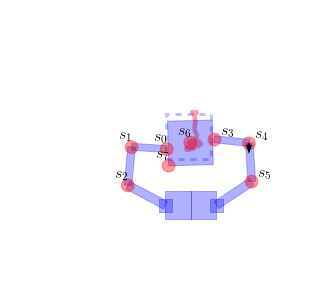

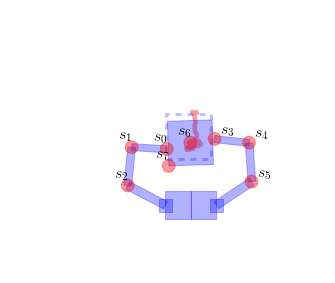

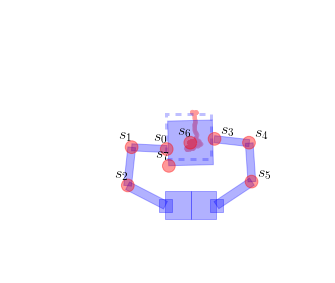

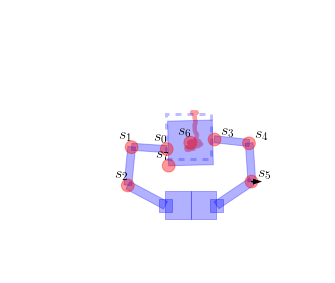

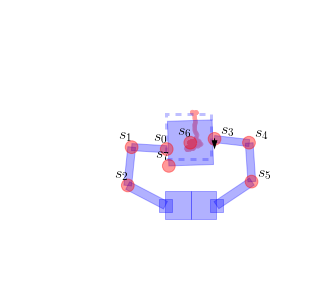

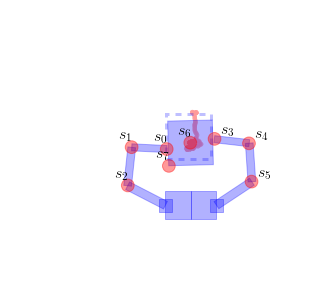

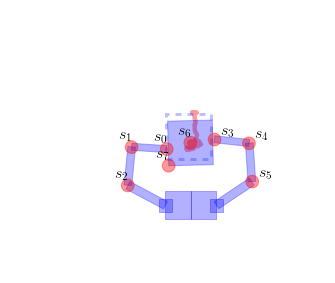

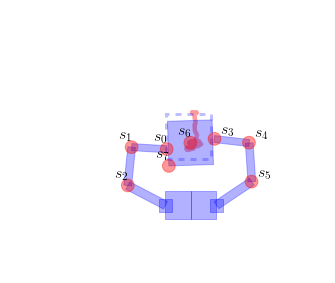

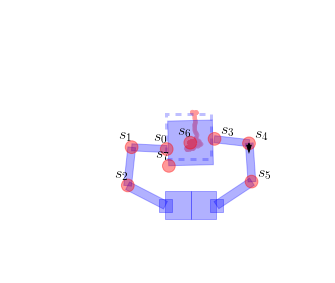

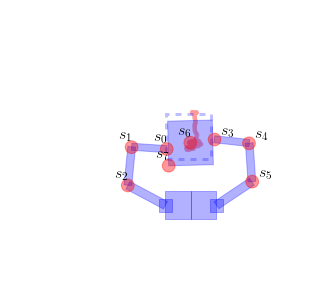

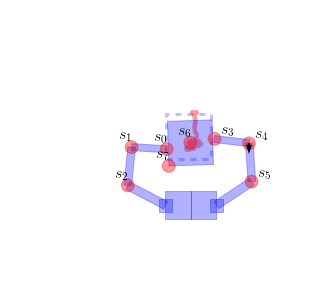

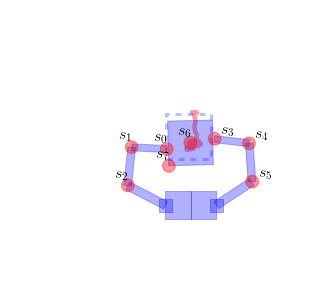

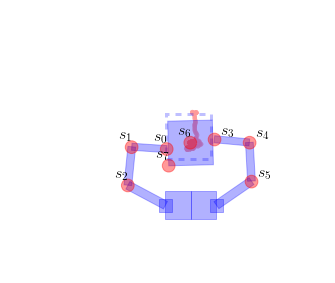

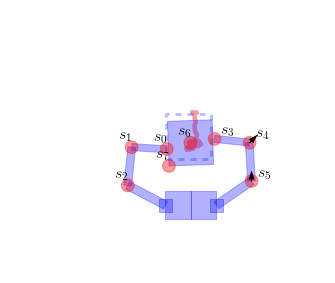

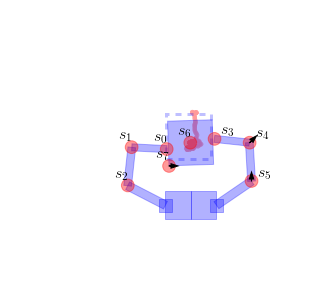

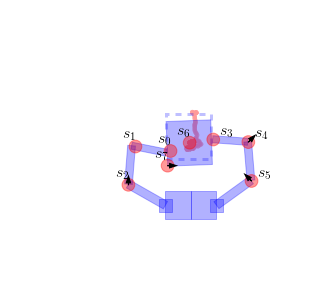

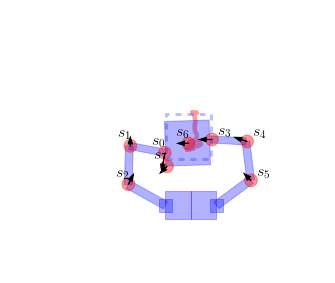

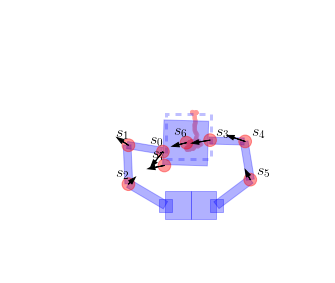

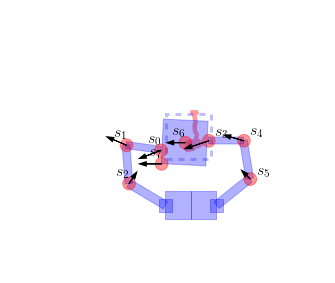

 .

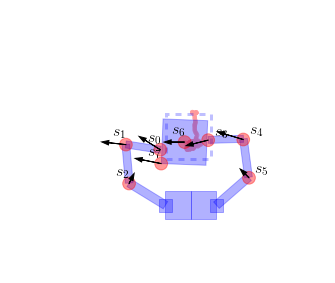

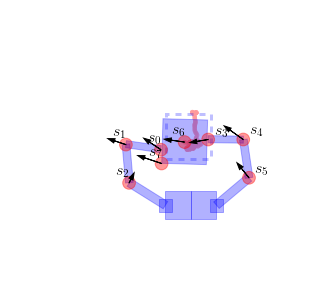

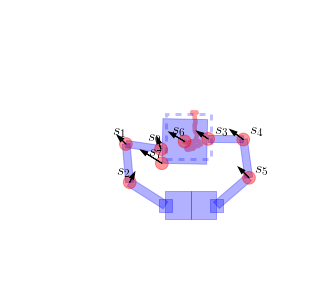

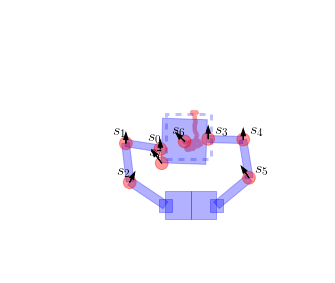

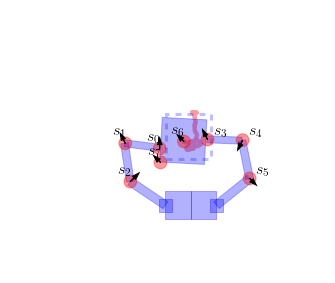

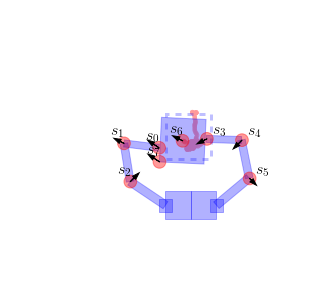

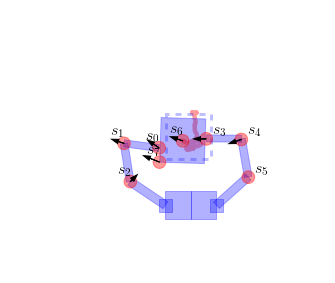

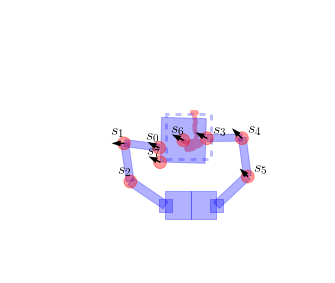

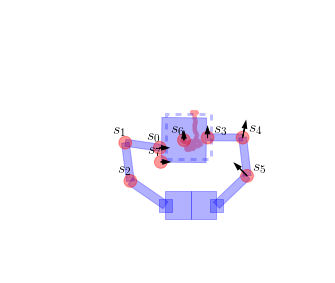

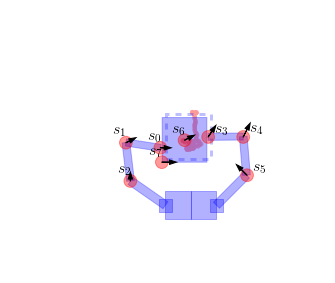

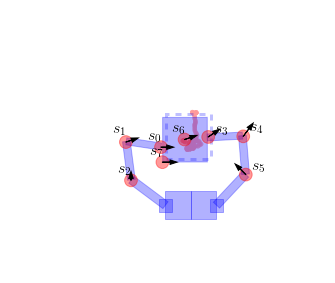

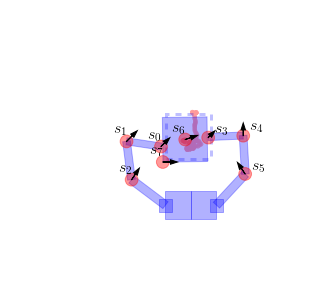

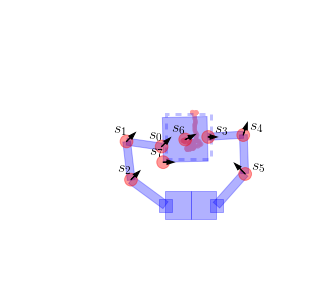

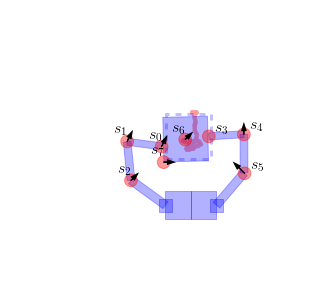

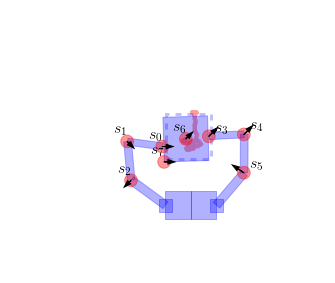

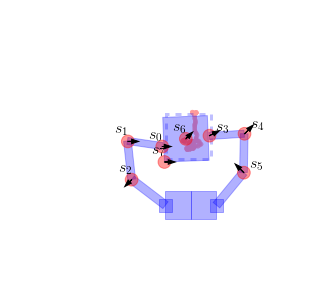

In [ ]:
print "iteration: ",i
learn.setGrabObjGoal(ini_far=0.35) 
while i<800:    
    learn.setGrabObjGoal(ini_far=0.35) 
    hleft = exp.getFinalHaptic(arm=0)
    hright = exp.getFinalHaptic(arm=1)
    if(ilast > 5 and hleft > 0.3 and hright > 0.3):
        learn.setGrabTowardsTarget()
        ilast = 3
    
    learn.myWorldLoop(2)

    hist = SM.getHistory(6)
    x,y = hist[:,0],hist[:,1]

    fig, ax = VectorFigUtils.makeFigure(axes=[-2,2,-.5,3])

    Box2DWorld.plotWorld(ax,nao=nao,obj=obj)
    Box2DWorld.plotVectors(ax, exp.getSalient(), dirs=learn.getSalientVel(), label='s')
    VectorFigUtils.decorate("x","y",mainfont=16)

    plt.scatter(x,y, color='#ff9999',alpha=0.2, edgecolors='none')

    plt.axis('off')
    plt.show()
    
    if(i%6==0): VectorFigUtils.savefig(fig,ax,'imgs/bi/bi%d.png'%i)
    i,ilast = i+1,ilast+1